In [258]:
%pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [259]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as st
from sklearn import ensemble, linear_model, tree
import missingno as msno

In [260]:
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')

In [261]:
train.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

In [262]:
train.head()


Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [263]:
train.tail()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
1455         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1456         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1457         Lvl    AllPub  ...        0    NaN  GdPrv        Shed    2500   
1458         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1459         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
1455      8   2007        WD         Normal     175000  
1456      2   2010        WD         Normal     210000  
1457      5   2010        WD         Normal     266500  
1458      4   2010        WD         Normal     142125  
1459      6   2008        WD         Normal     147500  

[5 rows x 81 columns]

In [264]:
numeric_data = train.select_dtypes(include=[np.number])
numeric_data.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [265]:
numeric_data.head()

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0     8450            7            5       2003   
1   2          20         80.0     9600            6            8       1976   
2   3          60         68.0    11250            7            5       2001   
3   4          70         60.0     9550            7            5       1915   
4   5          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  WoodDeckSF  OpenPorchSF  \
0          2003       196.0         706  ...           0           61   
1          1976         0.0         978  ...         298            0   
2          2002       162.0         486  ...           0           42   
3          1970         0.0         216  ...           0           35   
4          2000       350.0         655  ...         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2008   
1              0          0            0         0        0       5    2007   
2              0          0            0         0        0       9    2008   
3            272          0            0         0        0       2    2006   
4              0          0            0         0        0      12    2008   

   SalePrice  
0     208500  
1     181500  
2     223500  
3     140000  
4     250000  

[5 rows x 38 columns]

In [266]:
numeric_data.shape

(1460, 38)

In [267]:
year_data = [data for data in numeric_data if "Yr" in data or "Year" in data]

year_data

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [268]:
for data in year_data:
    print(data, train[data].unique())

YearBuilt [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]
YearRemodAdd [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]
GarageYrBlt [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 2006.

In [269]:
train.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

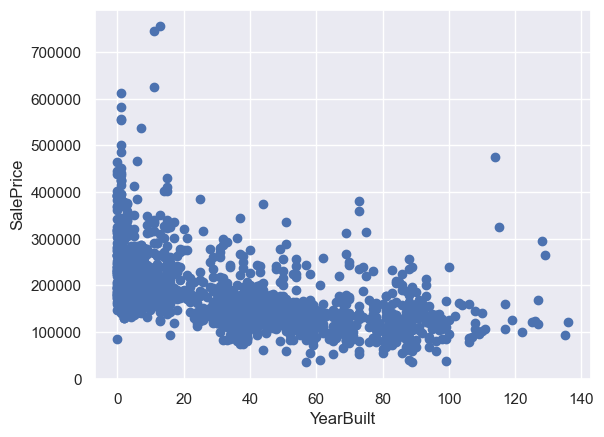

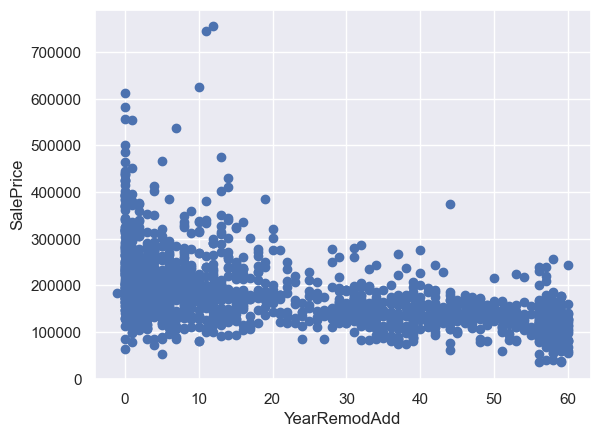

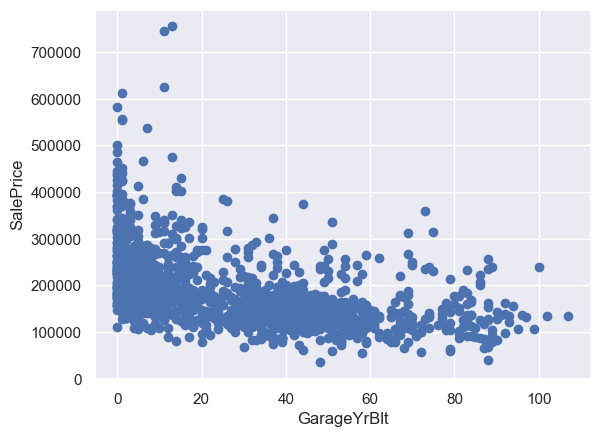

In [270]:
for feature in year_data:
    if feature != "YrSold":
        data = train.copy()
        data[feature] = data["YrSold"] - data[feature]
        plt.scatter(data[feature], data["SalePrice"])
        plt.xlabel(feature)
        plt.ylabel("SalePrice")
        plt.show()

In [271]:
descreate_data = [feature for feature in numeric_data if len(train[feature].unique()) < 25 and feature not in year_data]
print(f"Descreate variable count {len(descreate_data)}")

Descreate variable count 17


In [272]:
train[descreate_data].head()

MSSubClass  OverallQual  OverallCond  LowQualFinSF  BsmtFullBath  \
0          60            7            5             0             1   
1          20            6            8             0             0   
2          60            7            5             0             1   
3          70            7            5             0             1   
4          60            8            5             0             1   

   BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  \
0             0         2         1             3             1             8   
1             1         2         0             3             1             6   
2             0         2         1             3             1             6   
3             0         1         0             3             1             7   
4             0         2         1             4             1             9   

   Fireplaces  GarageCars  3SsnPorch  PoolArea  MiscVal  MoSold  
0           0           2          0         0        0       2  
1           1           2          0         0        0       5  
2           1           2          0         0        0       9  
3           1           3          0         0        0       2  
4           1           3          0         0        0      12

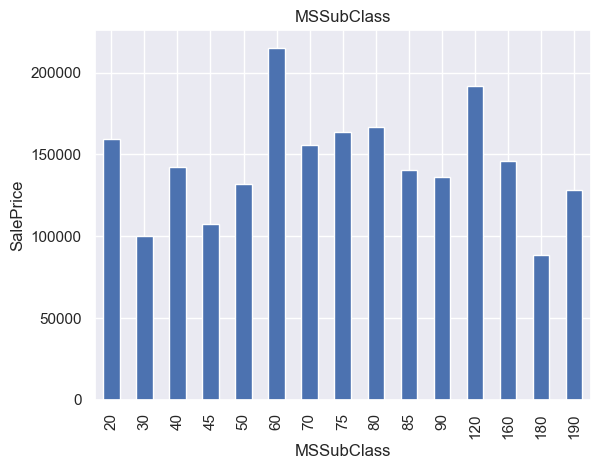

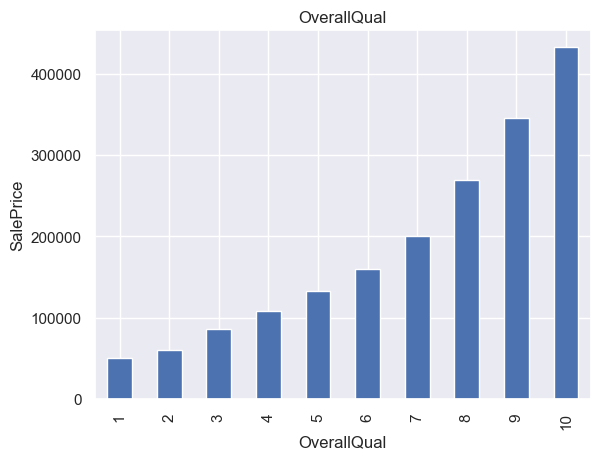

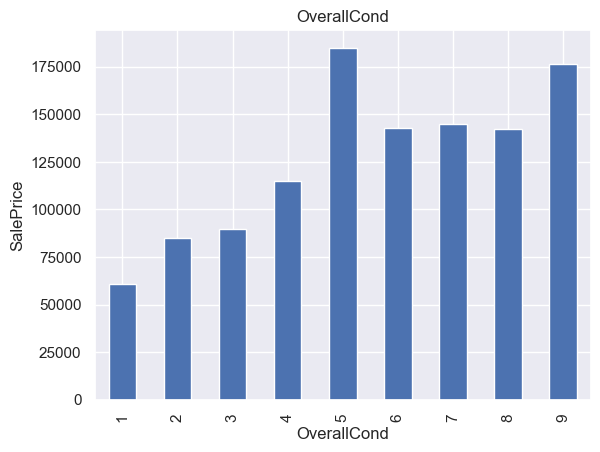

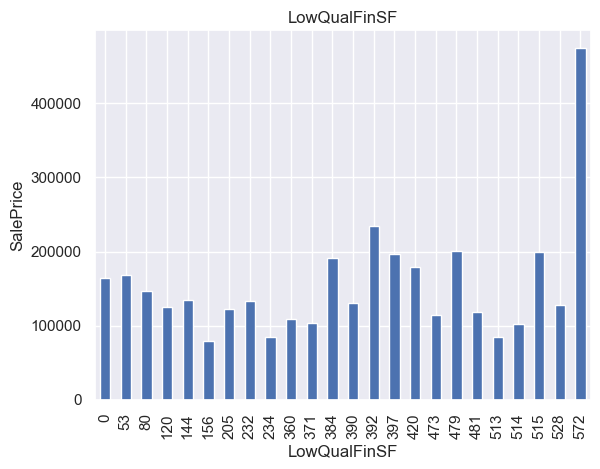

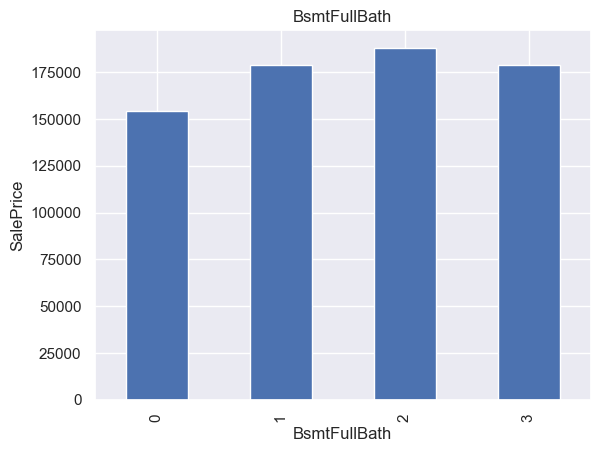

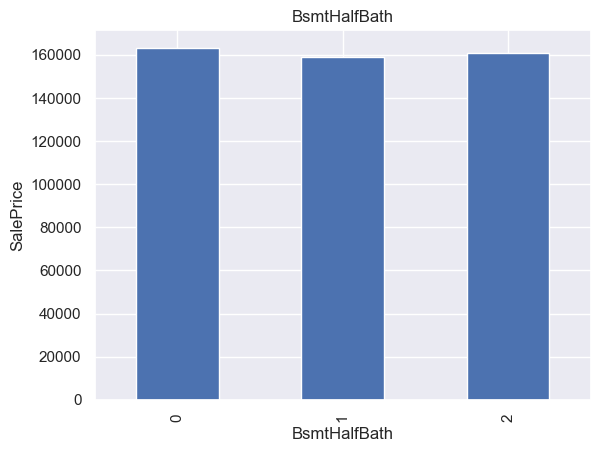

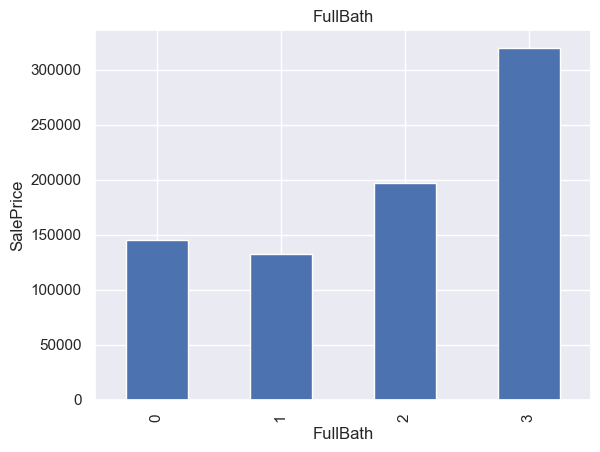

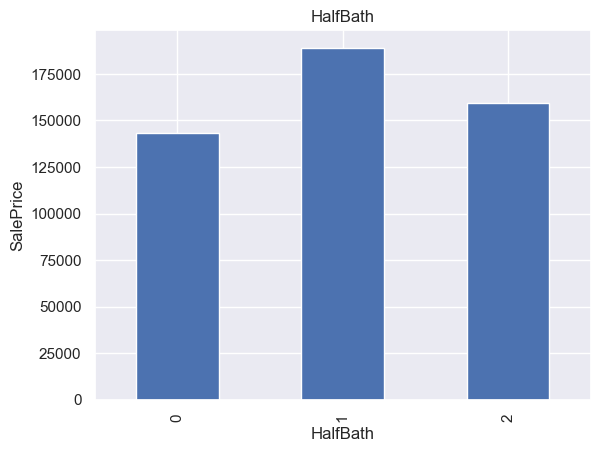

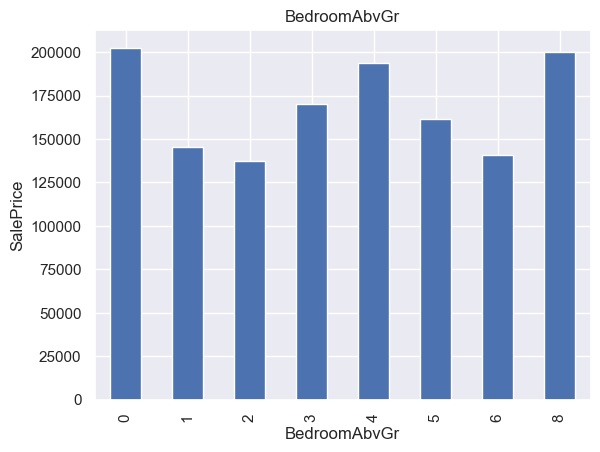

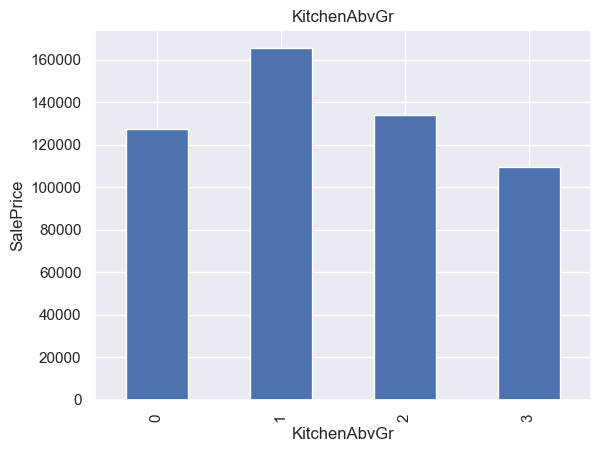

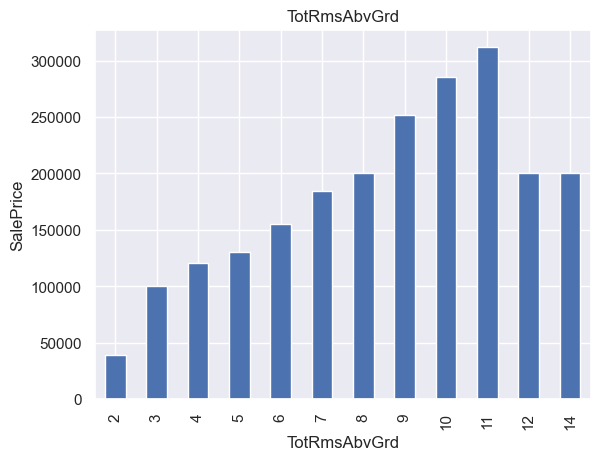

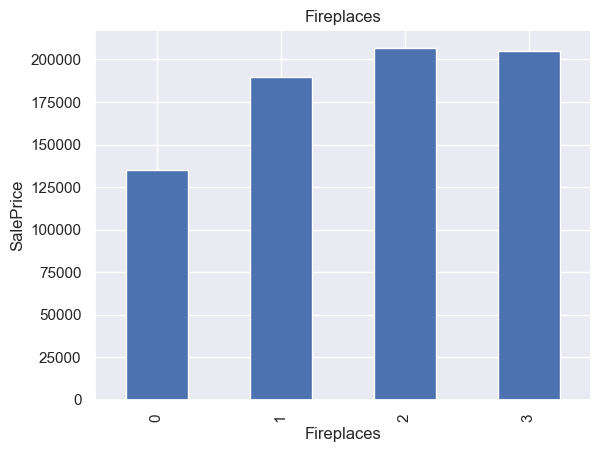

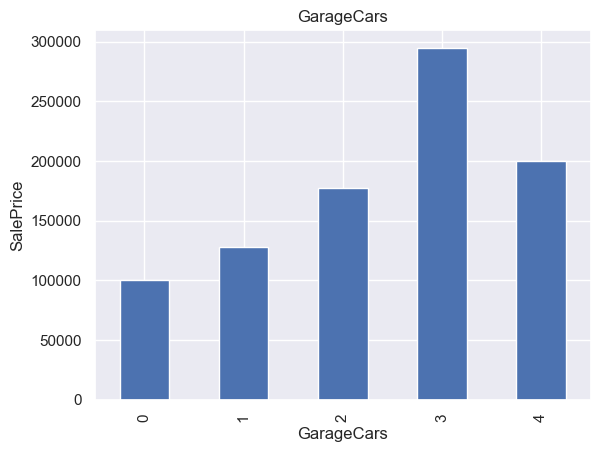

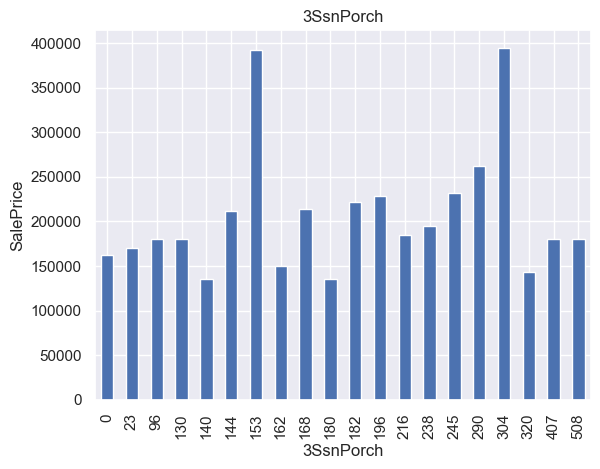

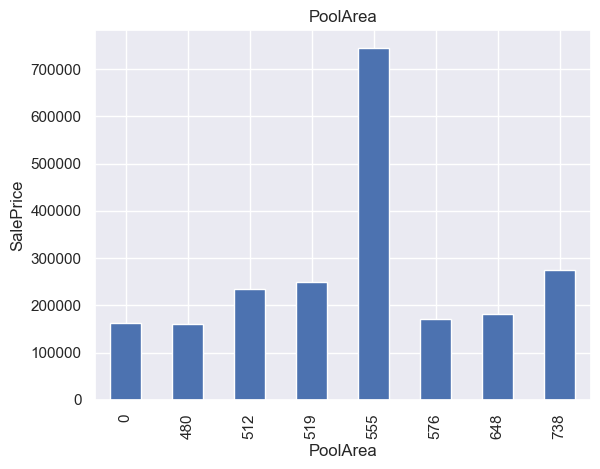

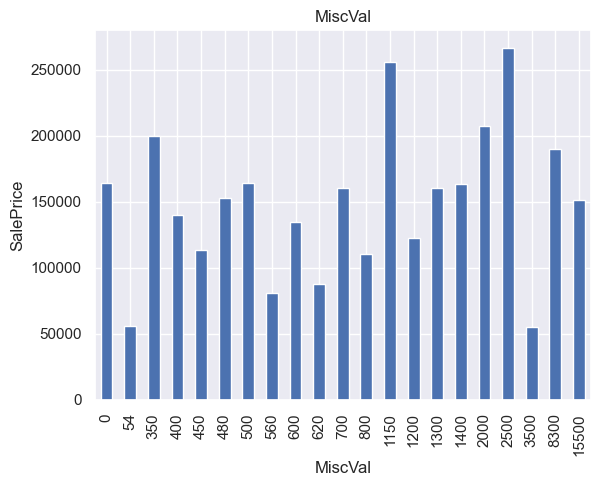

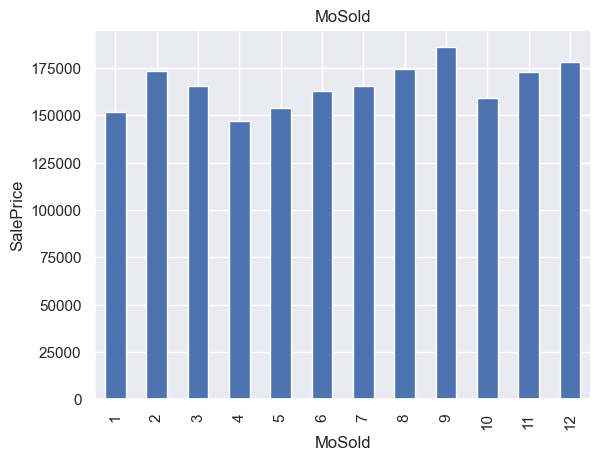

In [273]:
for feature in descreate_data:
    data = train.copy()
    data.groupby(feature)["SalePrice"].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel("SalePrice")
    plt.title(feature)
    plt.show()

In [274]:
continous_data = [feature for feature in numeric_data if feature not in descreate_data + year_data + ['Id']]
print(f"Continous feature count {len(continous_data)}")

Continous feature count 16


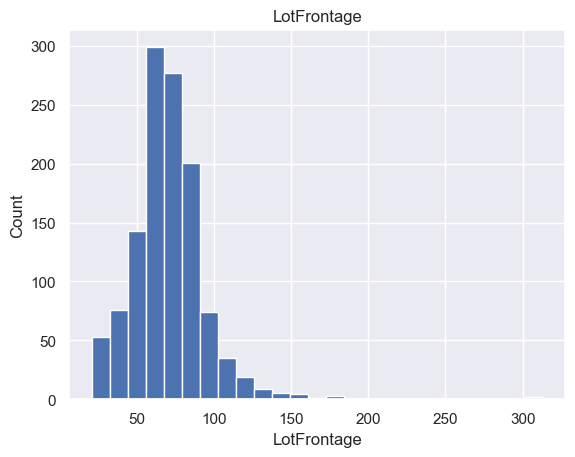

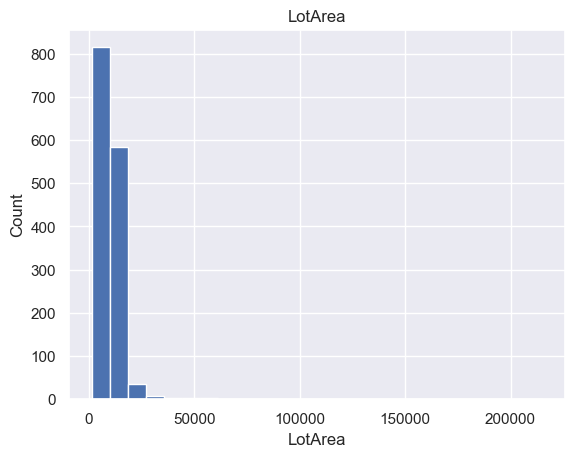

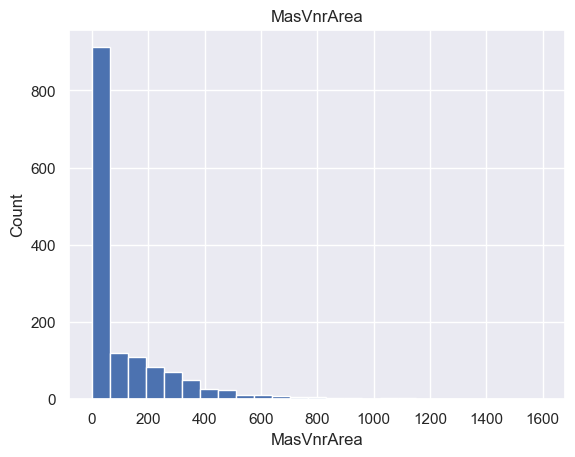

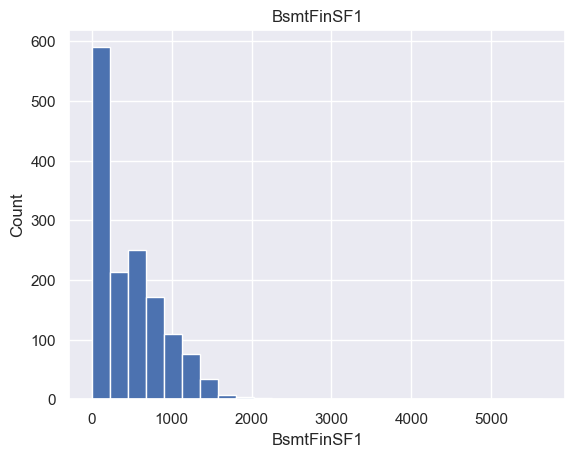

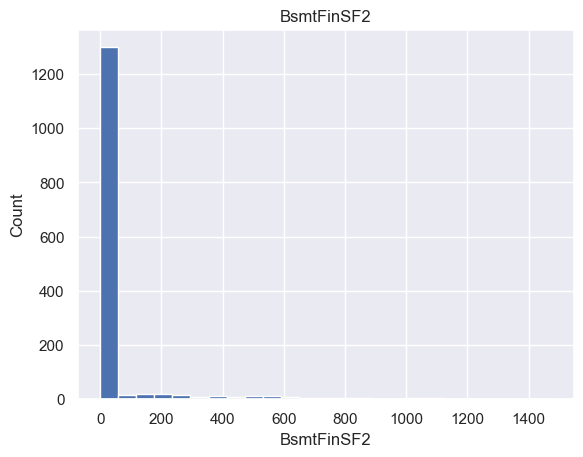

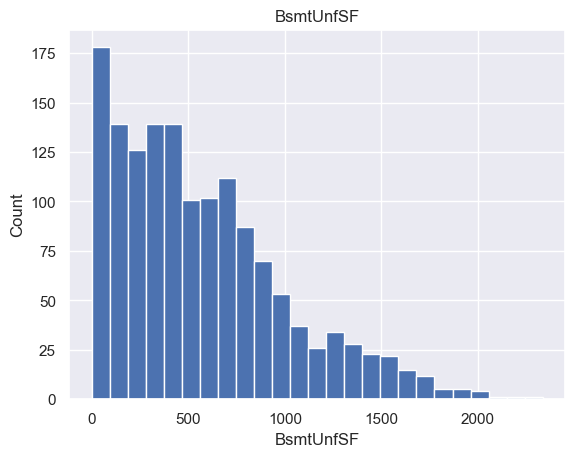

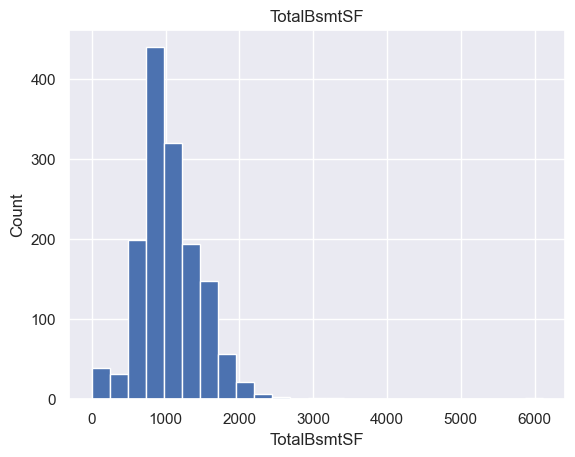

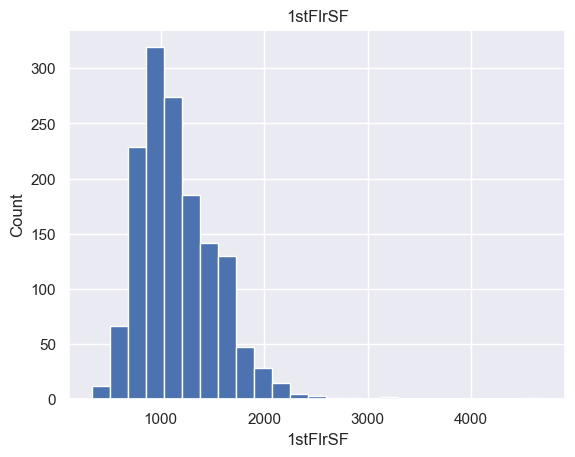

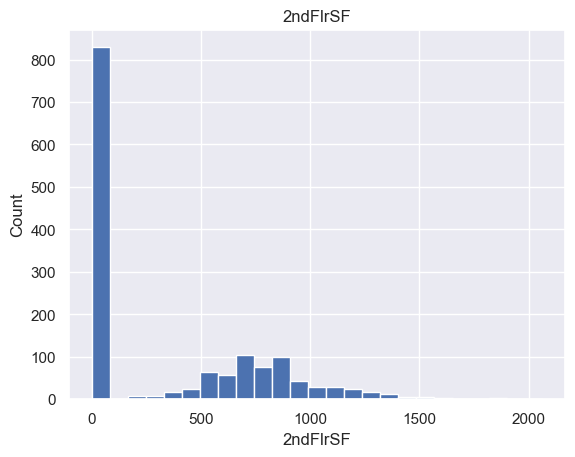

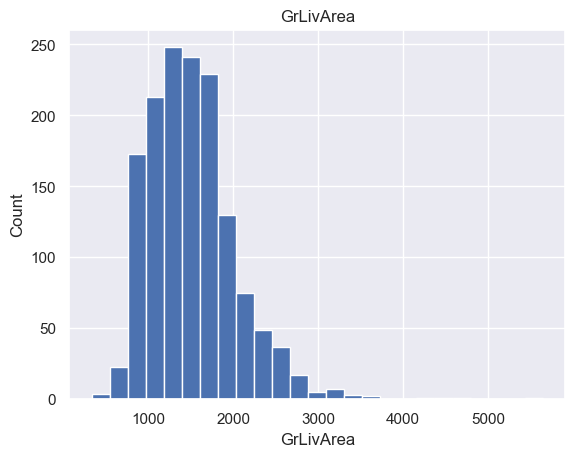

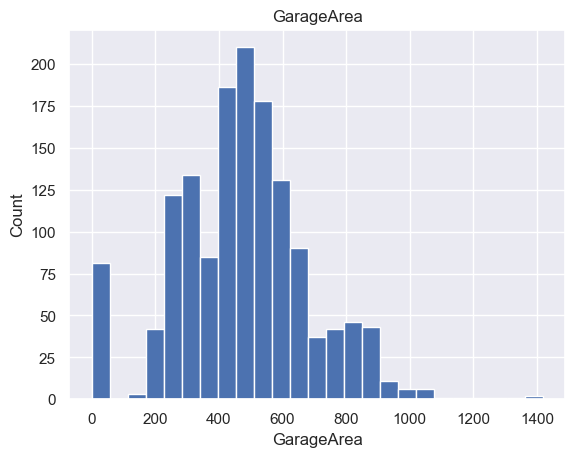

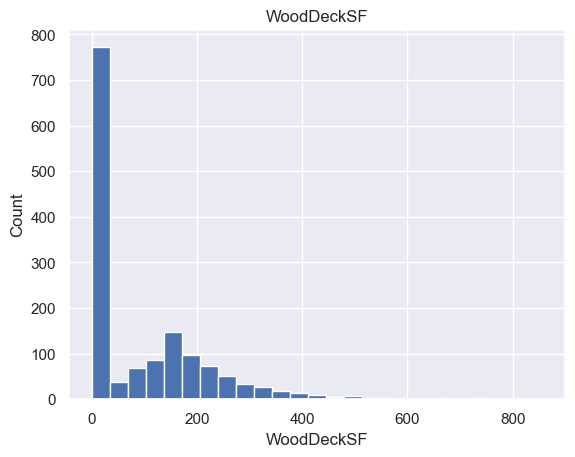

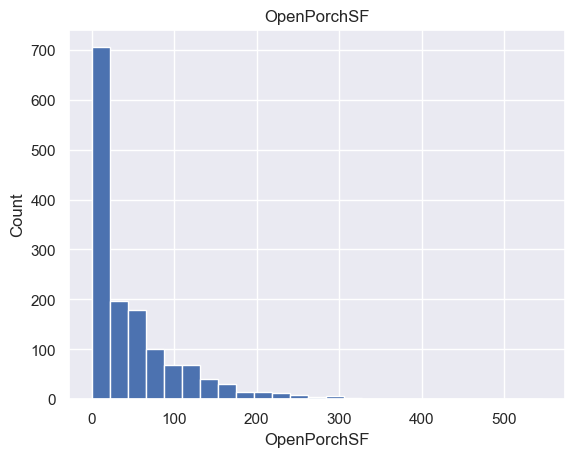

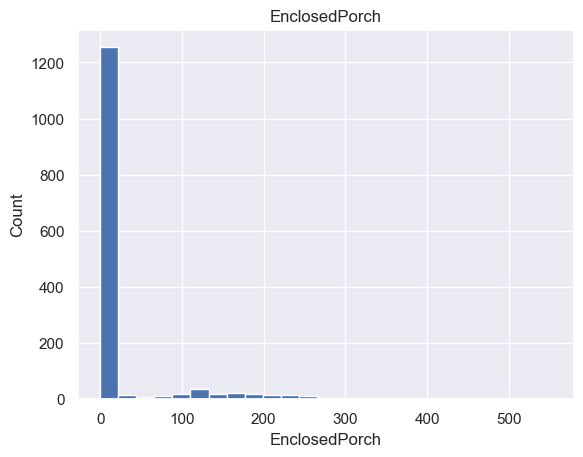

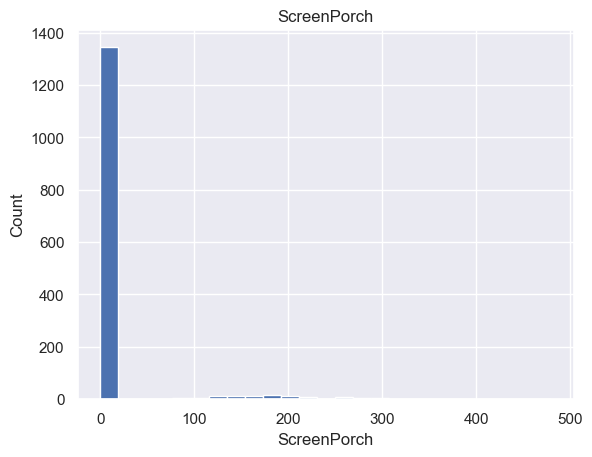

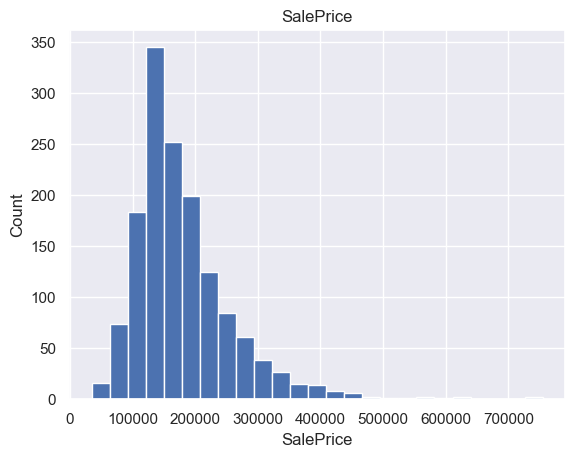

In [275]:
for feature in continous_data:
    data = train.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

In [276]:
categorical_data = train.select_dtypes(include=[np.object_])
categorical_data.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

<Axes: >

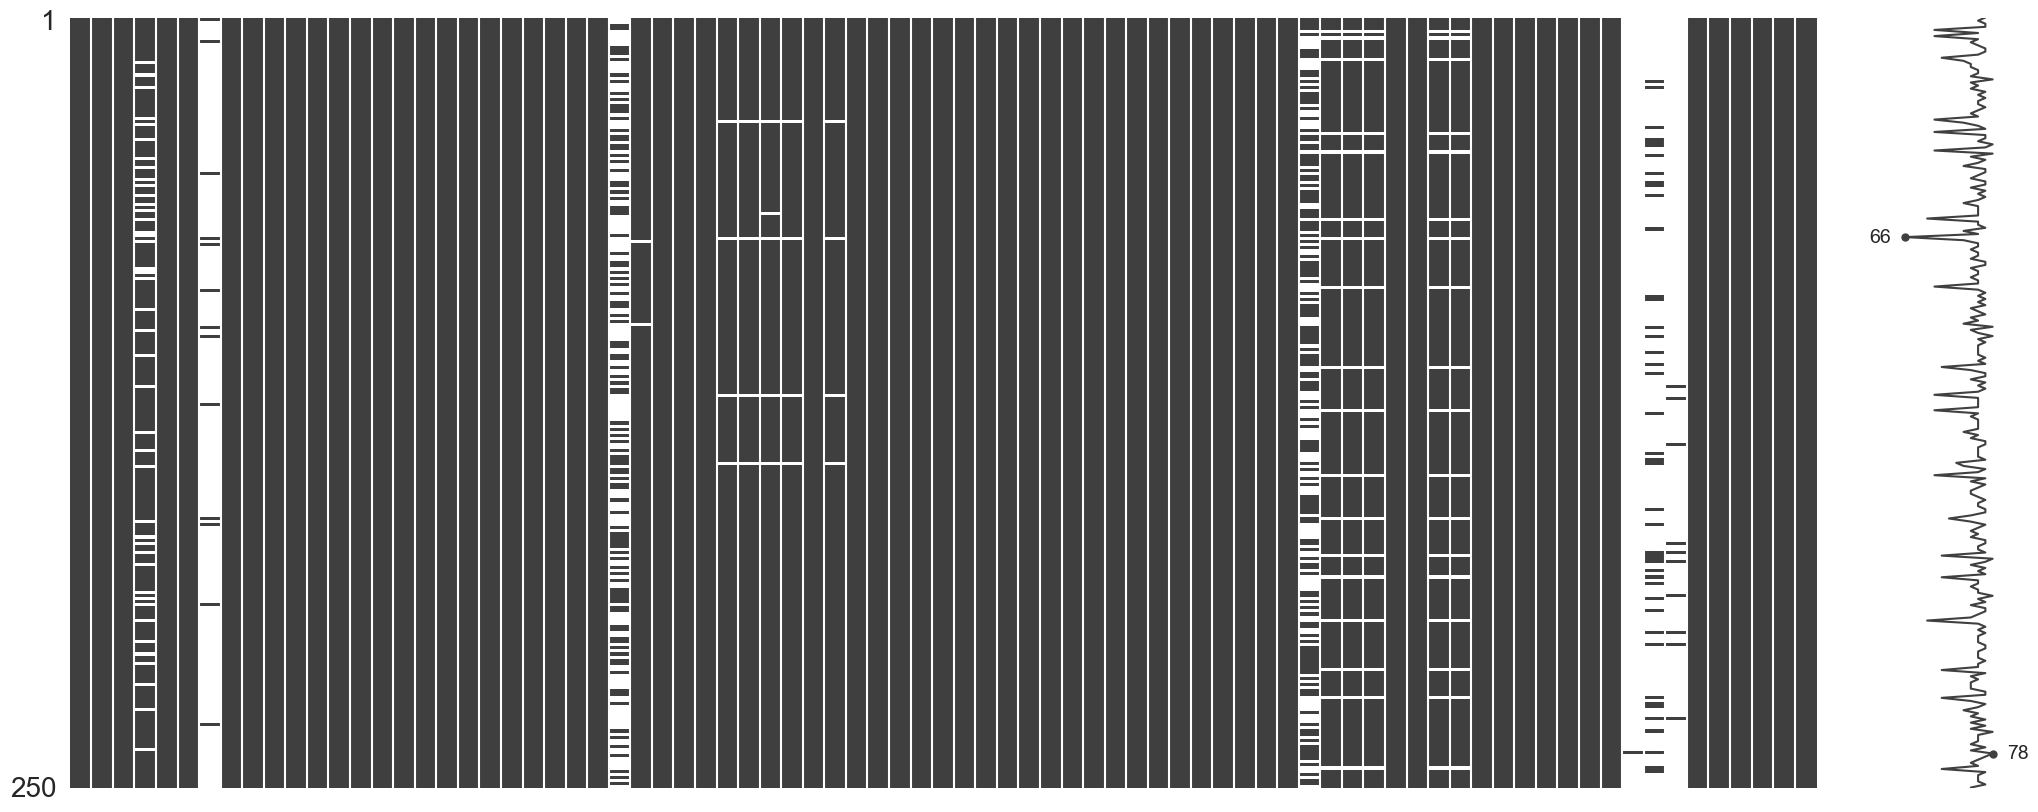

In [277]:
msno.matrix(train.sample(250))

/opt/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


ValueError: could not convert string to float: '--'

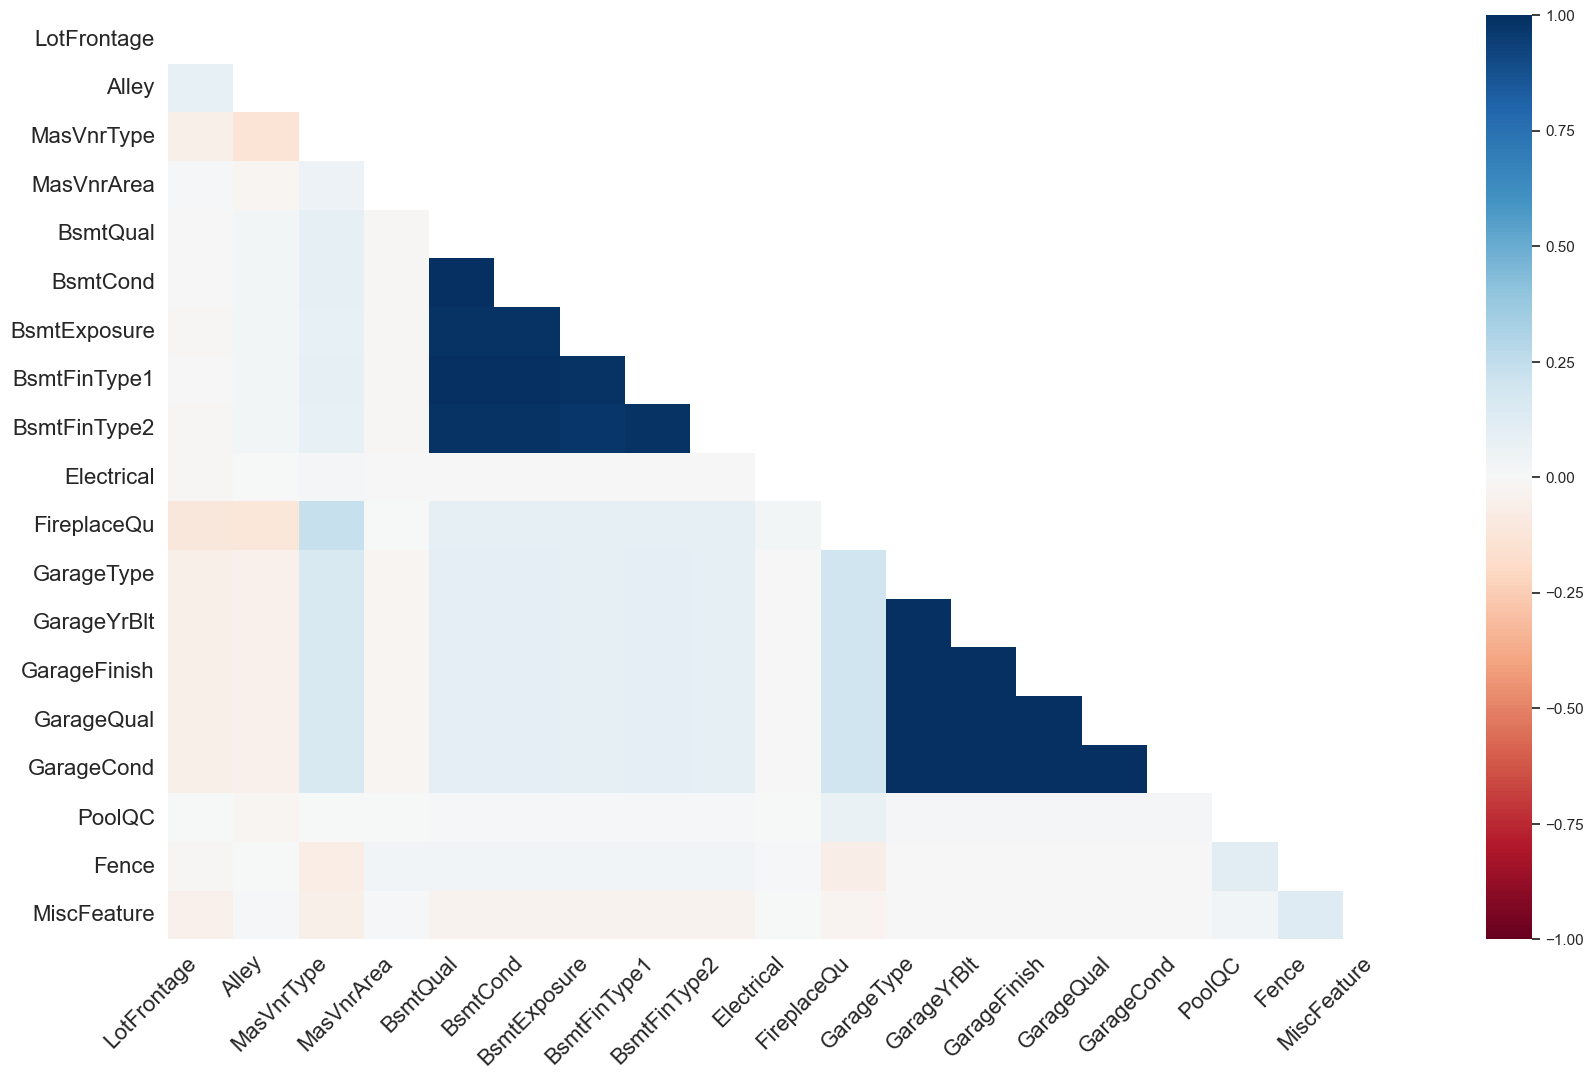

In [289]:
msno.heatmap(train)


<Axes: >

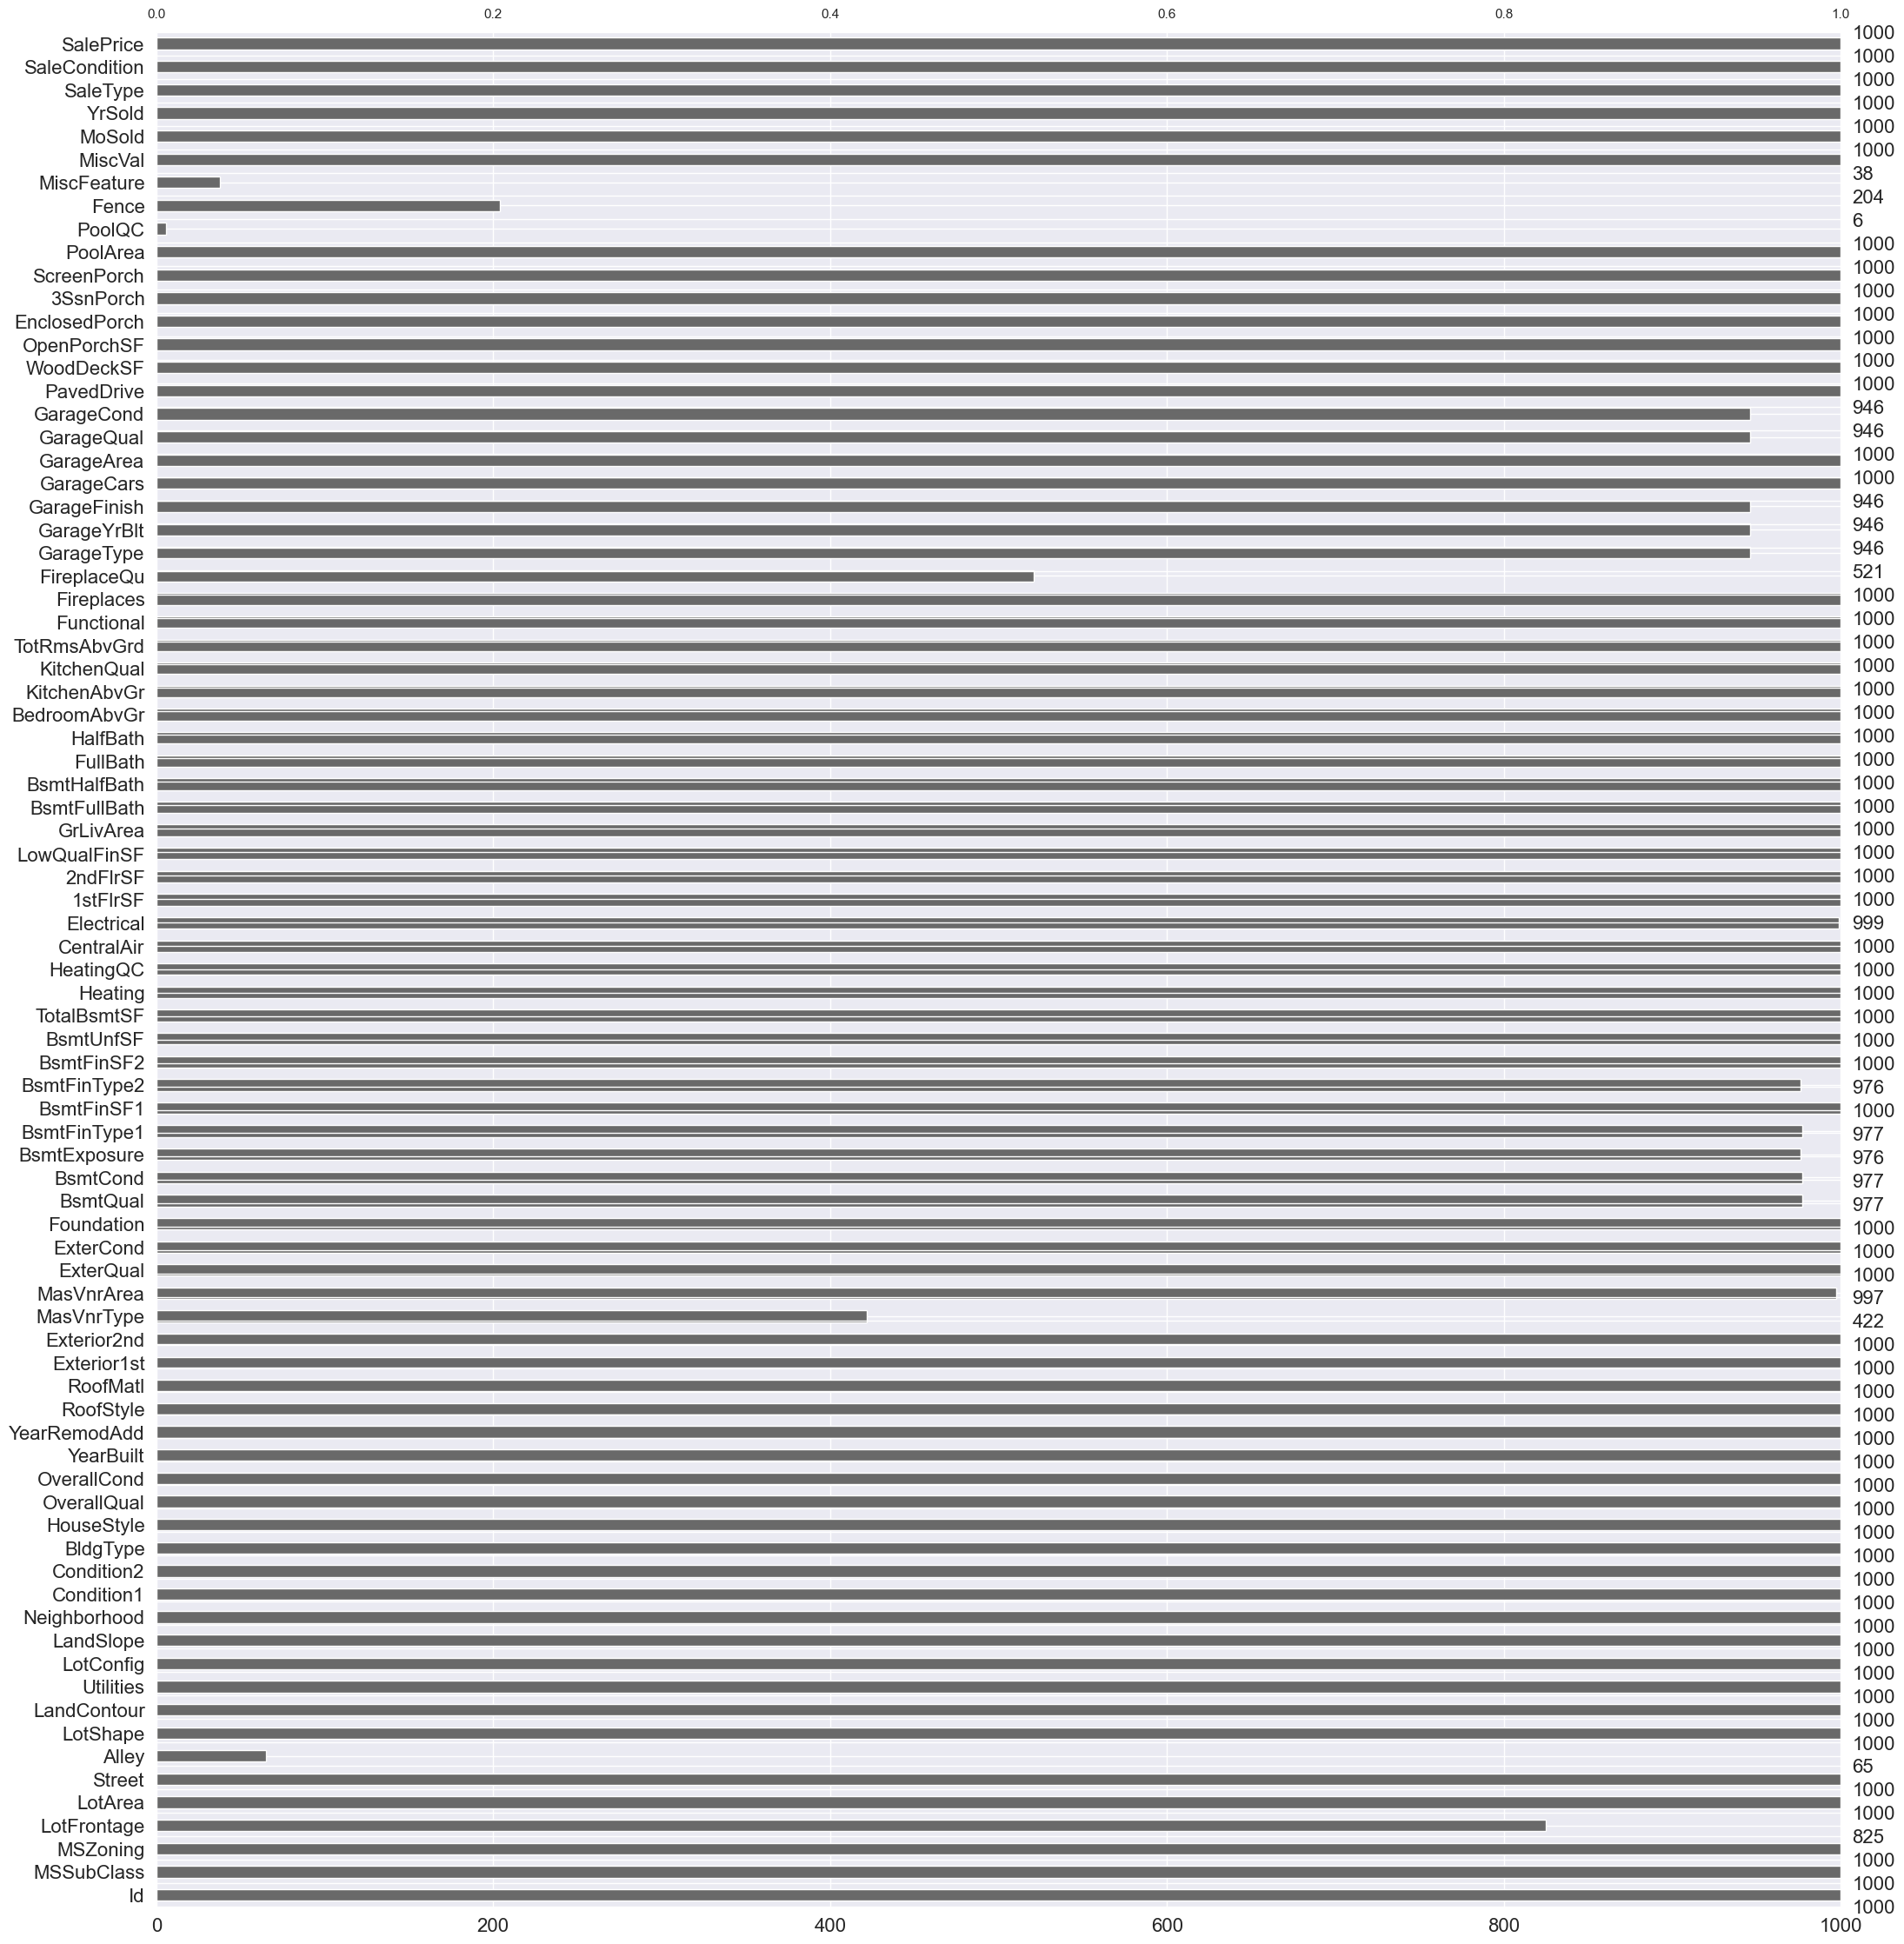

In [281]:
msno.bar(data.sample(1000))

<Axes: >

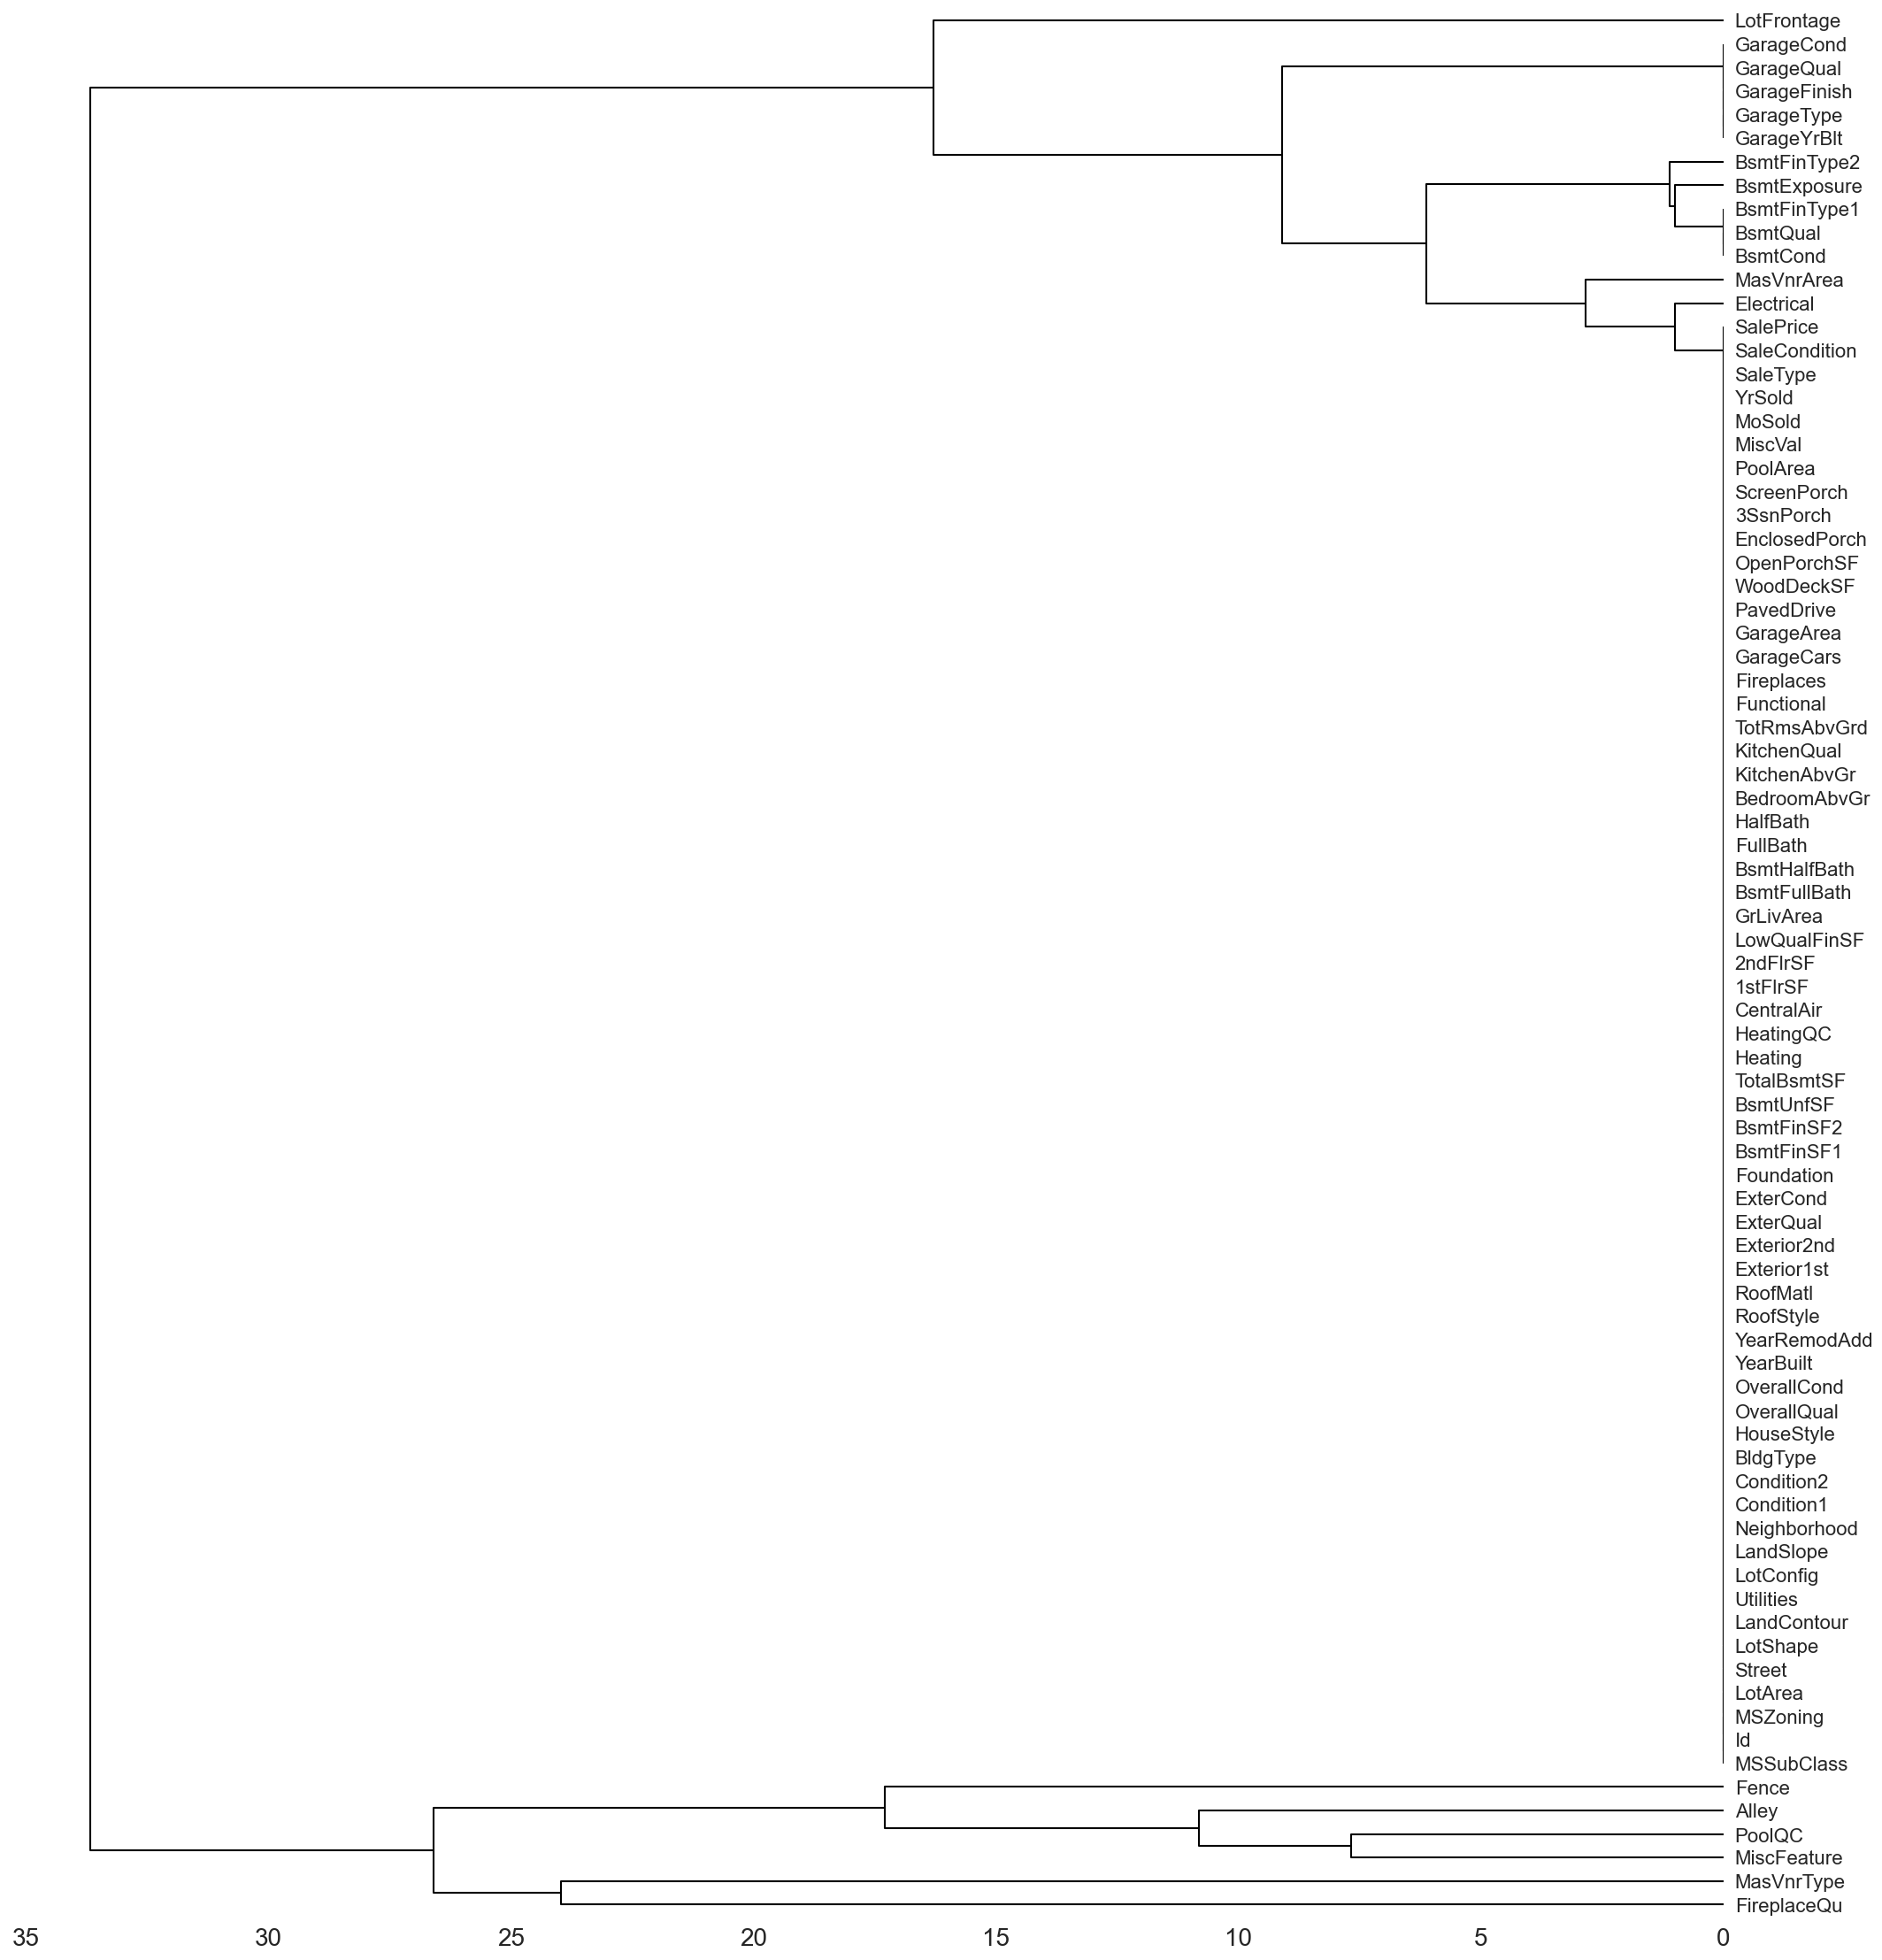

In [282]:
msno.dendrogram(train)

In [283]:
numeric_data.skew(), numeric_data.kurt()

(Id                0.000000
 MSSubClass        1.407657
 LotFrontage       2.163569
 LotArea          12.207688
 OverallQual       0.216944
 OverallCond       0.693067
 YearBuilt        -0.613461
 YearRemodAdd     -0.503562
 MasVnrArea        2.669084
 BsmtFinSF1        1.685503
 BsmtFinSF2        4.255261
 BsmtUnfSF         0.920268
 TotalBsmtSF       1.524255
 1stFlrSF          1.376757
 2ndFlrSF          0.813030
 LowQualFinSF      9.011341
 GrLivArea         1.366560
 BsmtFullBath      0.596067
 BsmtHalfBath      4.103403
 FullBath          0.036562
 HalfBath          0.675897
 BedroomAbvGr      0.211790
 KitchenAbvGr      4.488397
 TotRmsAbvGrd      0.676341
 Fireplaces        0.649565
 GarageYrBlt      -0.649415
 GarageCars       -0.342549
 GarageArea        0.179981
 WoodDeckSF        1.541376
 OpenPorchSF       2.364342
 EnclosedPorch     3.089872
 3SsnPorch        10.304342
 ScreenPorch       4.122214
 PoolArea         14.828374
 MiscVal          24.476794
 MoSold            0

/var/folders/0x/6g78zn811lx20sbw8vydh3lw0000gn/T/ipykernel_12717/3786127663.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y, kde=False, fit=st.johnsonsu)
/var/folders/0x/6g78zn811lx20sbw8vydh3lw0000gn/T/ipykernel_12717/3786127663.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y, kde=

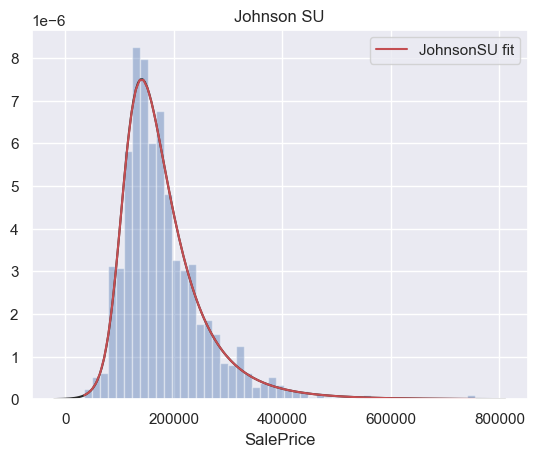

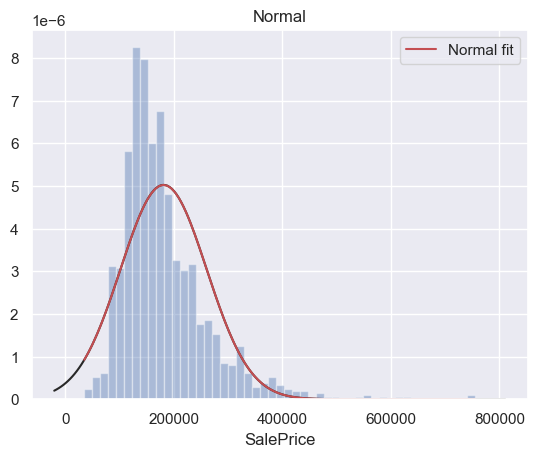

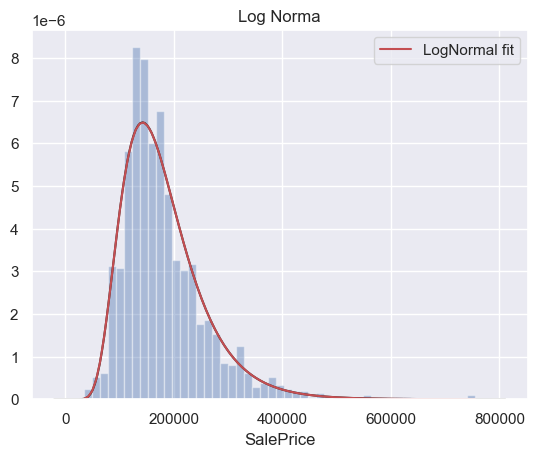

In [284]:
y = train["SalePrice"]
# Johnson SU
plt.figure(1); plt.title('Johnson SU')
sns.distplot(y, kde=False, fit=st.johnsonsu)

param_johnsonsu = st.johnsonsu.fit(y)
x = np.linspace(min(y), max(y), 100)
pdf_johnsonsu = st.johnsonsu.pdf(x, *param_johnsonsu)

plt.plot(x, pdf_johnsonsu, 'r-', label="JohnsonSU fit")
plt.legend()

# Normal 
plt.figure(2); plt.title('Normal')
sns.distplot(y, kde=False, fit=st.norm)

param_normal = st.norm.fit(y)
x = np.linspace(min(y), max(y), 100)
pdf_normal = st.norm.pdf(x, *param_normal)

plt.plot(x, pdf_normal, 'r-', label="Normal fit")
plt.legend()

# Log Normal 
plt.figure(3); plt.title('Log Norma')
sns.distplot(y, kde=False, fit=st.lognorm)

param_lognormal = st.lognorm.fit(y)
x = np.linspace(min(y), max(y), 100)
pdf_lognormal = st.lognorm.pdf(x, *param_lognormal)

plt.plot(x, pdf_lognormal, 'r-', label="LogNormal fit")
plt.legend()

(array([  5.,  12.,  54., 184., 470., 400., 220.,  90.,  19.,   6.]),
 array([10.46024211, 10.7676652 , 11.07508829, 11.38251138, 11.68993448,
        11.99735757, 12.30478066, 12.61220375, 12.91962684, 13.22704994,
        13.53447303]),
 <BarContainer object of 10 artists>)

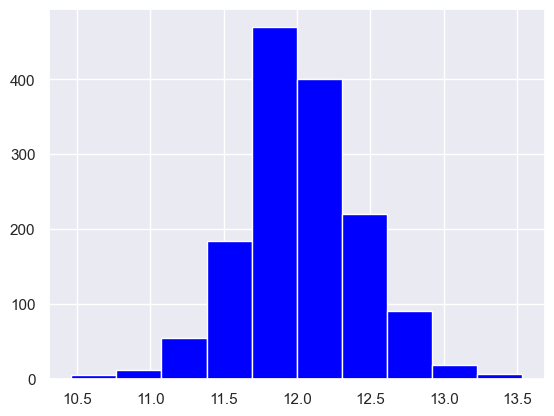

In [285]:
target = np.log(train["SalePrice"])
target.skew()
plt.hist(target, color='blue')

In [286]:
correlation_data = numeric_data.corr()
print(correlation_data["SalePrice"].sort_values(ascending=False), '\n')

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

<Axes: title={'center': 'Correlation Numeric Feature Using Sale Price'}>

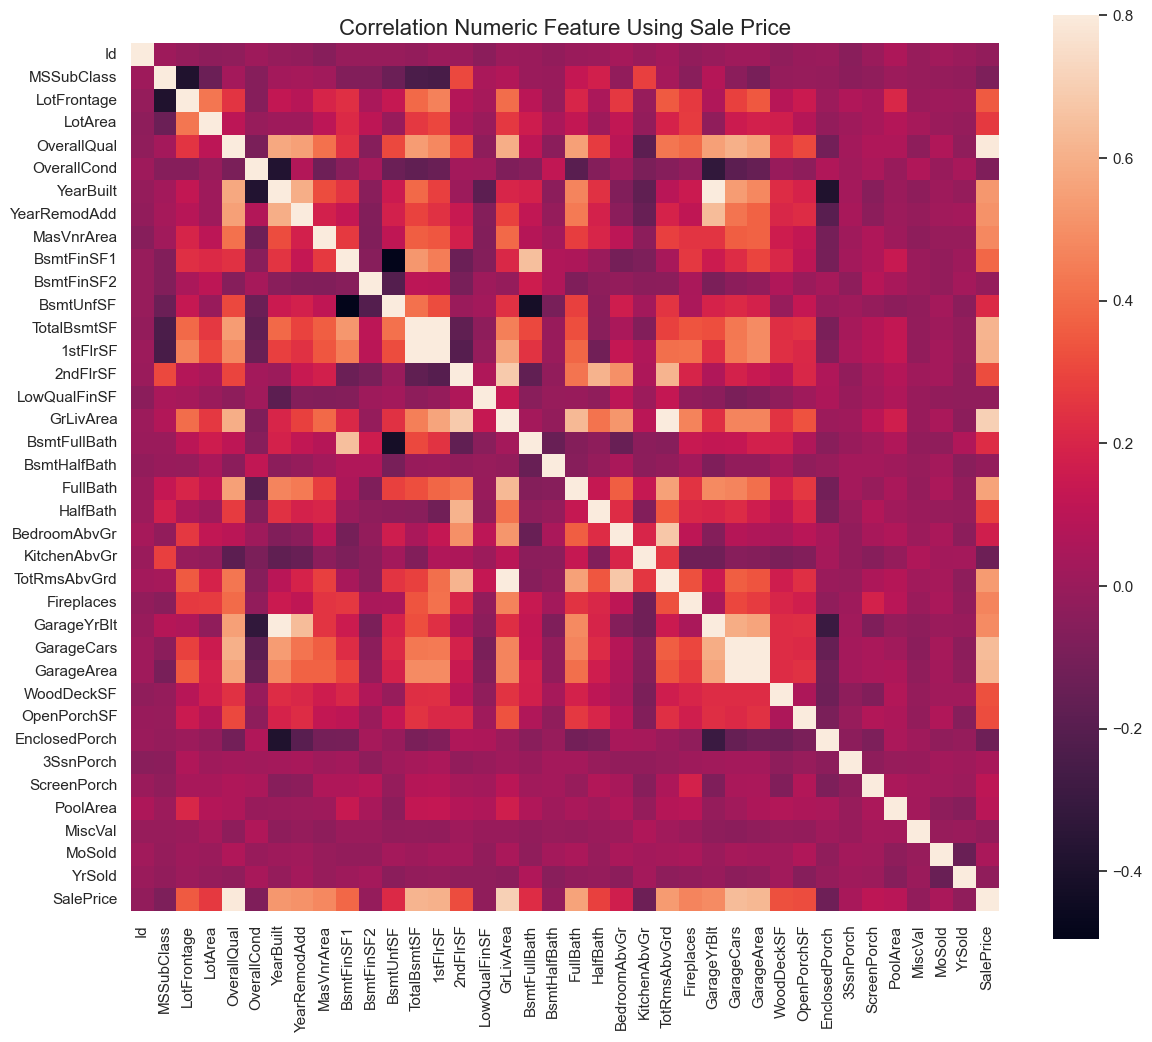

In [287]:
f, ax = plt.subplots(figsize = (14,12))
plt.title("Correlation Numeric Feature Using Sale Price", y=1, size=16)
sns.heatmap(correlation_data, square=True, vmax=0.8)


In [290]:
k = 11
cols = correlation_data.nlargest(k, 'SalePrice')['SalePrice'].index
print(cols)

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
       'YearRemodAdd'],
      dtype='object')


<Axes: >

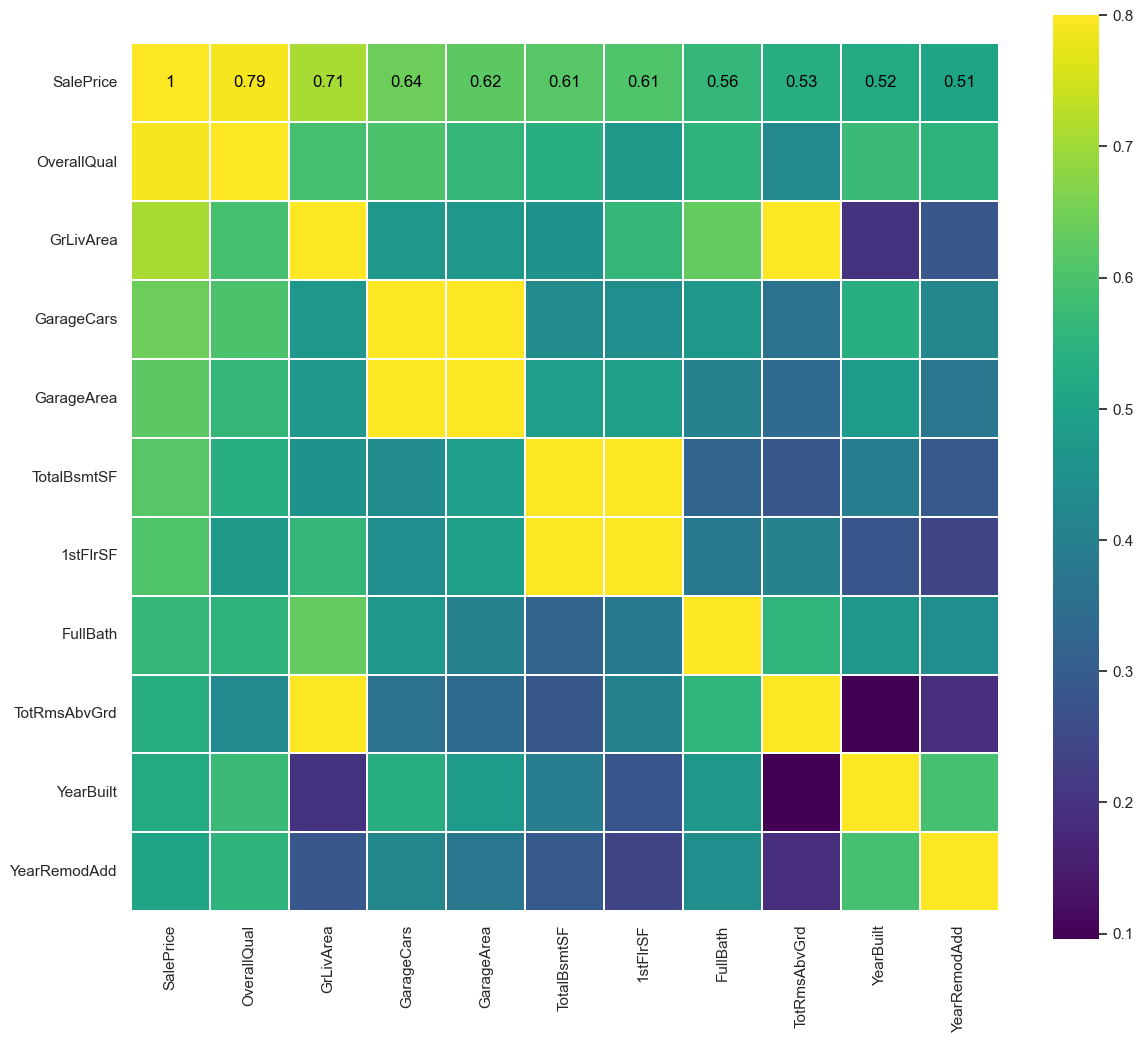

In [291]:
cm = np.corrcoef(numeric_data[cols].values.T)
f, ax = plt.subplots(figsize = (14, 12))
sns.heatmap(cm, vmax=.8, linewidths=0.01, square=True, annot=True, cmap='viridis', linecolor='white', xticklabels=cols.values, annot_kws={ 'size': 12, 'color': 'black' }, yticklabels=cols.values)



/opt/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/a

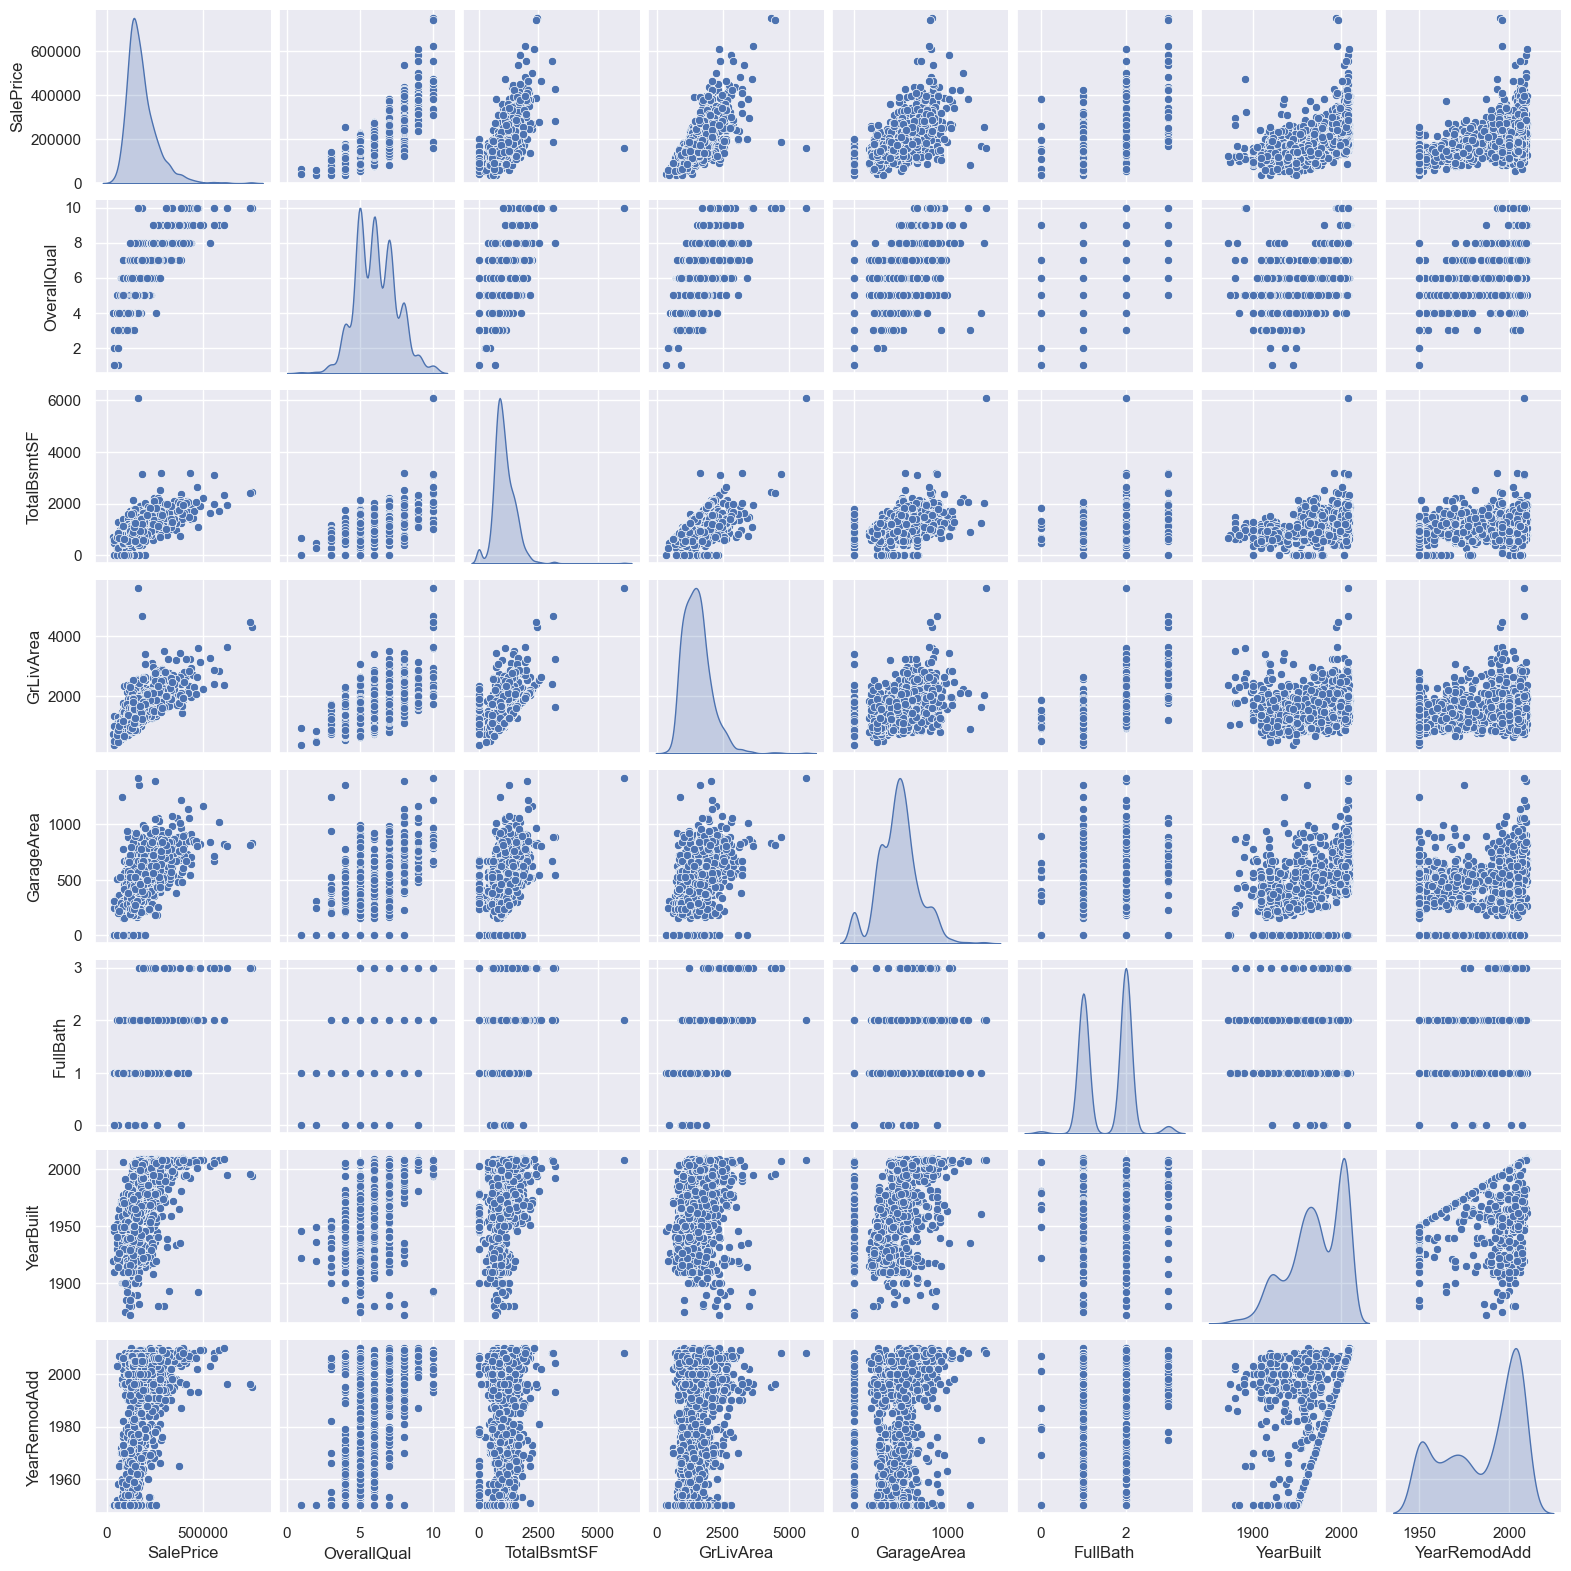

In [292]:
sns.set()
columns = ['SalePrice', 'OverallQual', 'TotalBsmtSF', 'GrLivArea', 'GarageArea', 'FullBath', 'YearBuilt', 'YearRemodAdd']
sns.pairplot(numeric_data[columns], size=2, kind='scatter', diag_kind="kde")
plt.show()

(-0.5, 9.5, 0.0, 800000.0)

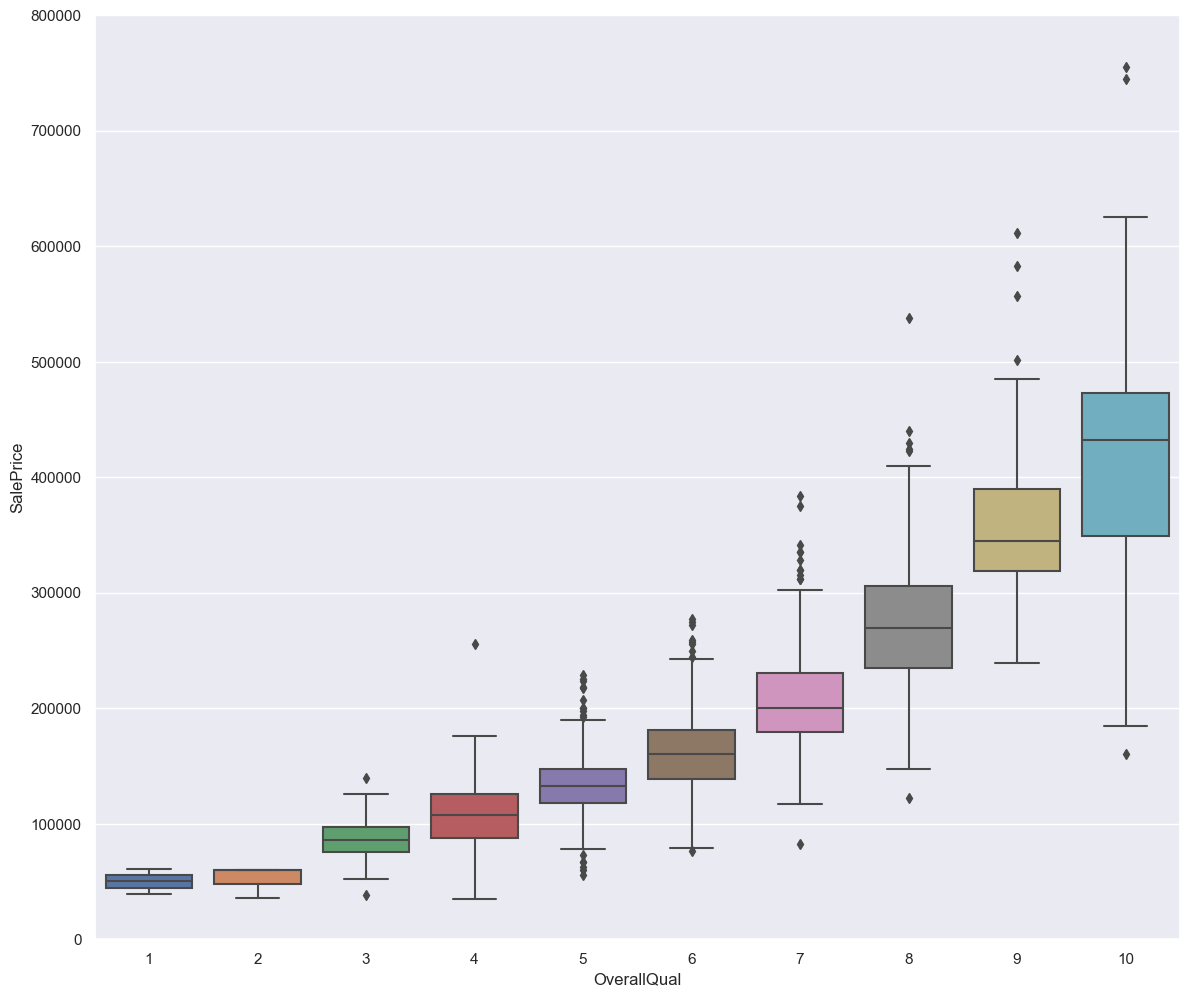

In [293]:
var = 'OverallQual'
data = pd.concat([train["SalePrice"], train[var]], axis=1)
f, ax = plt.subplots(figsize = (14, 12))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000)

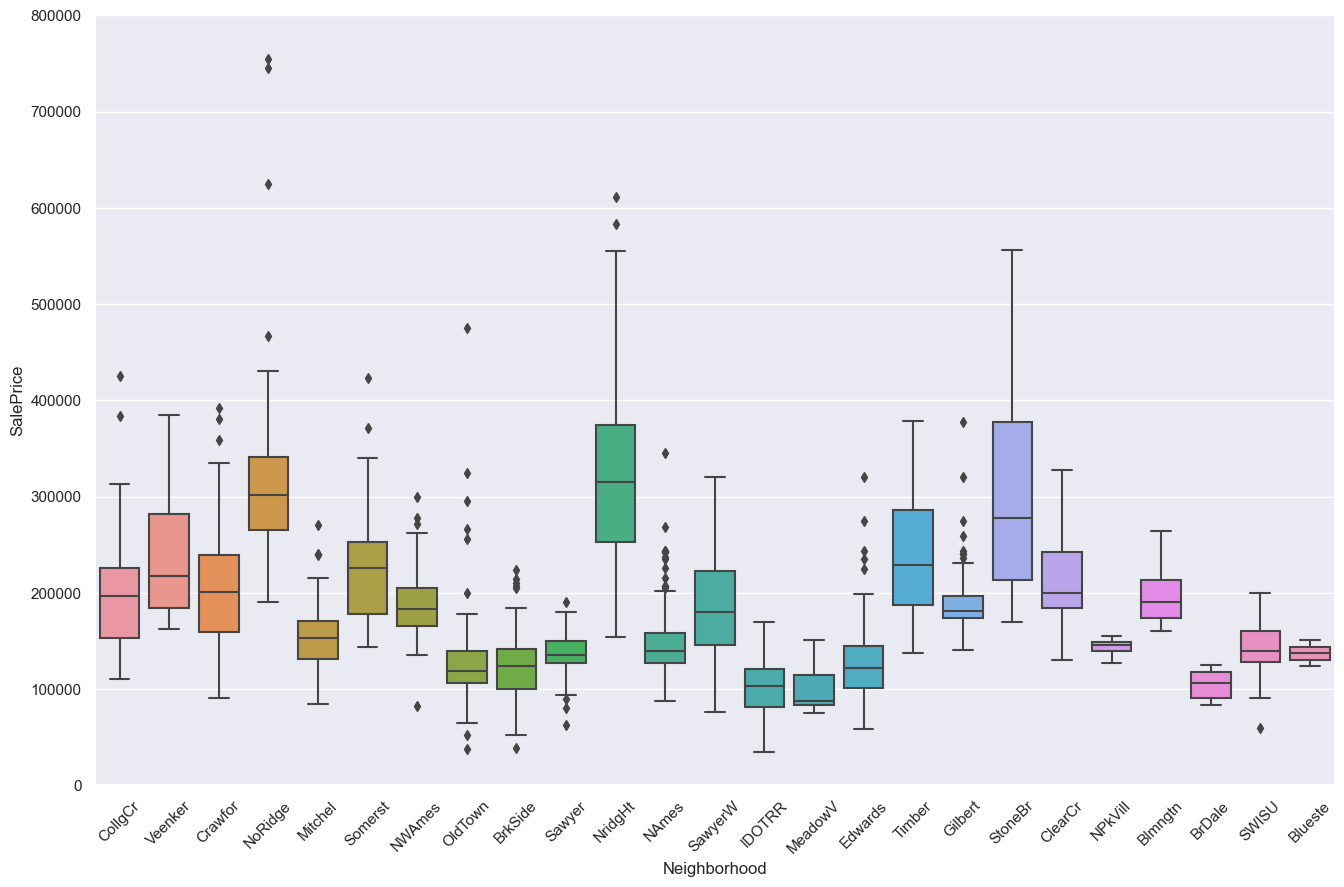

In [294]:
var = 'Neighborhood'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
f, ax = plt.subplots(figsize = (16, 10))
fig = sns.boxplot(x=var, y='SalePrice', data=data)
fig.axis(ymin=0, ymax=800000)
xt = plt.xticks(rotation=45) 

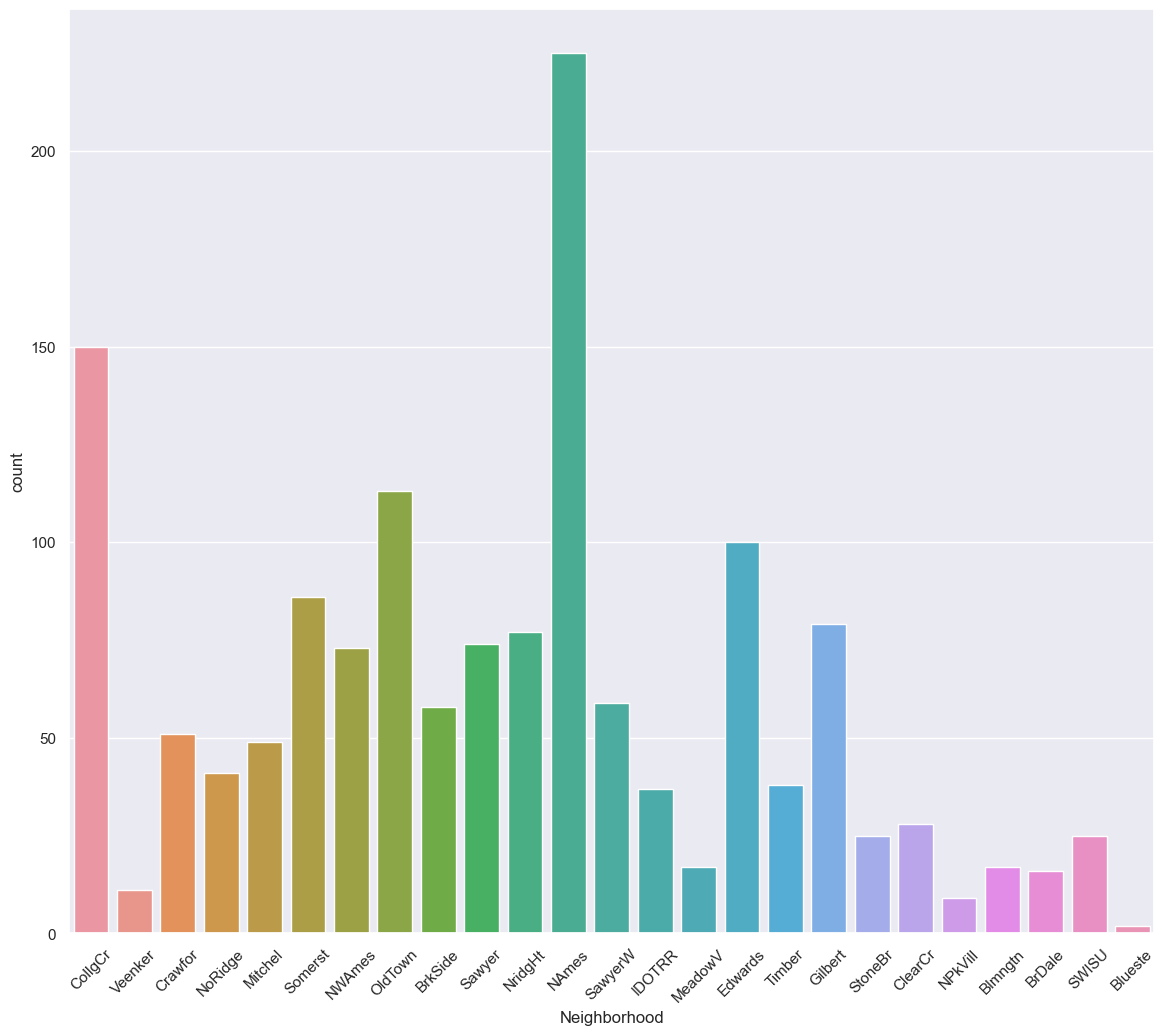

In [295]:
plt.figure(figsize=(14, 12))
sns.countplot(x = 'Neighborhood', data=data)
xt = plt.xticks(rotation=45)

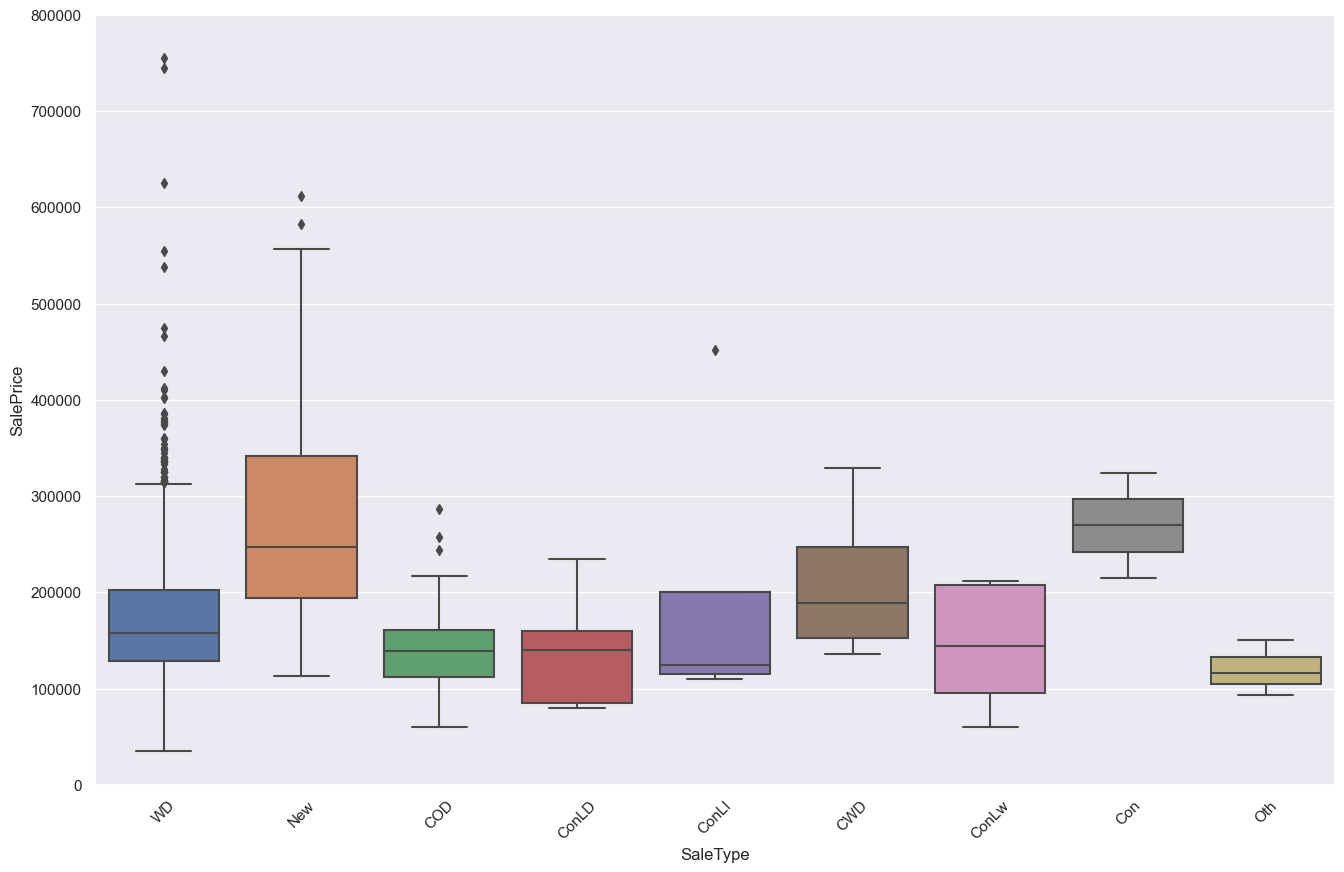

In [296]:
var = 'SaleType'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
f, ax = plt.subplots(figsize = (16, 10))
fig = sns.boxplot(x=var, y='SalePrice', data=data)
fig.axis(ymin=0, ymax=800000)
xt = plt.xticks(rotation=45) 

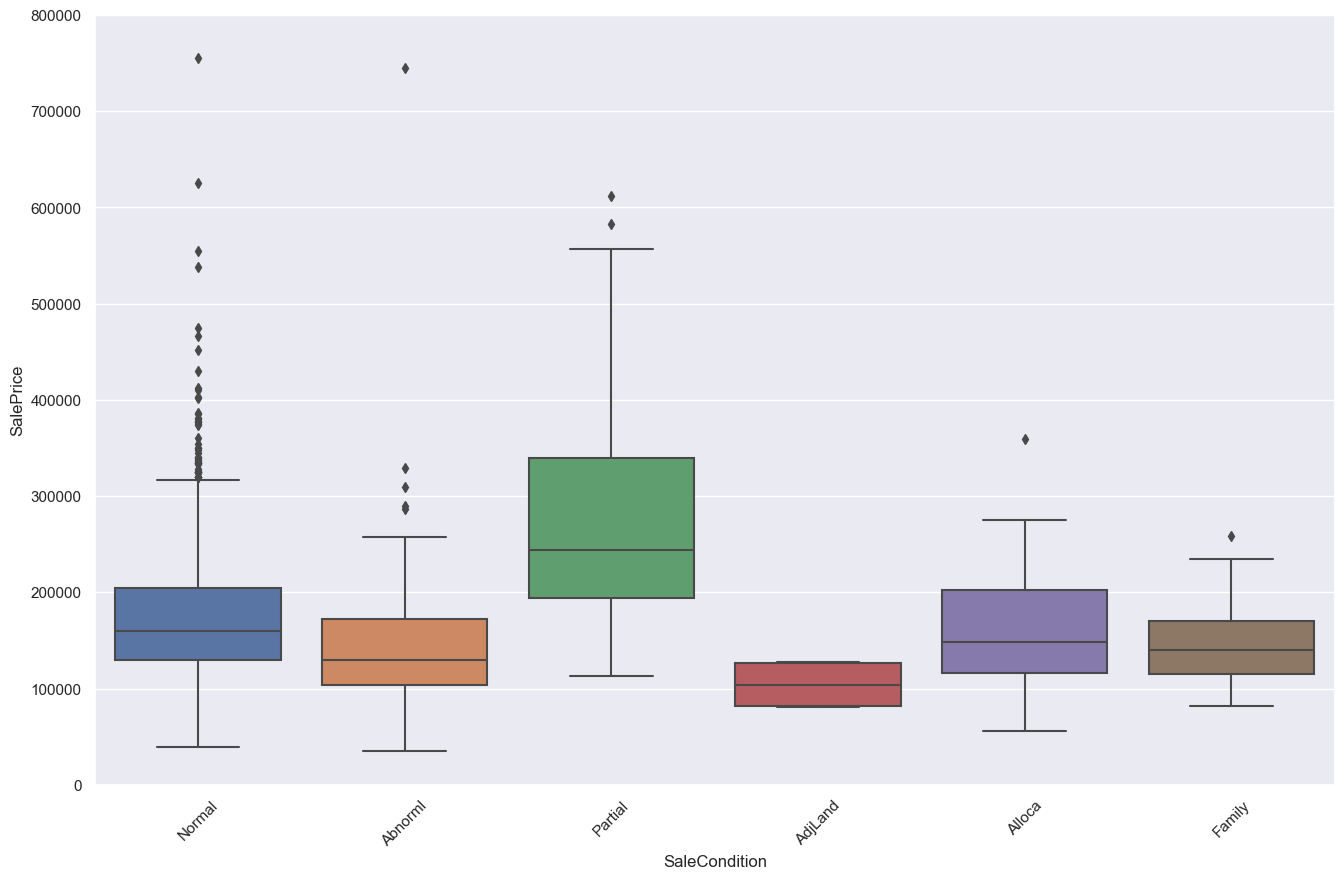

In [297]:
var = 'SaleCondition'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
f, ax = plt.subplots(figsize = (16, 10))
fig = sns.boxplot(x=var, y='SalePrice', data=data)
fig.axis(ymin=0, ymax=800000)
xt = plt.xticks(rotation=45) 

<Axes: xlabel='Functional', ylabel='SalePrice'>

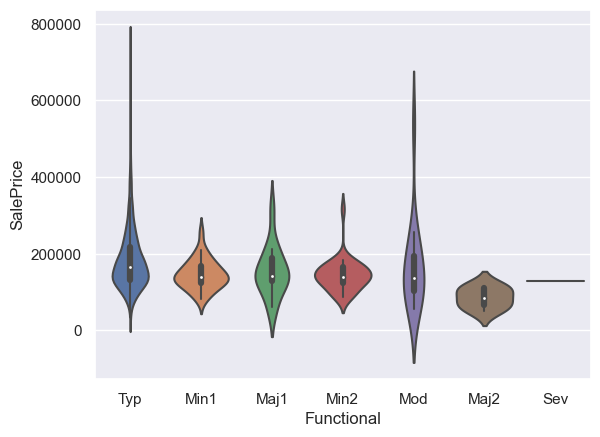

In [298]:
sns.violinplot(x='Functional', y='SalePrice', data = train)

In [299]:
data = pd.read_csv('./train.csv')
nomissing_values = [values for values in data.columns if data[values].isnull().sum() > 1]
for values in nomissing_values:
    print(values, np.round(data[values].isnull().mean(), 4), ' % missing values')

LotFrontage 0.1774  % missing values
Alley 0.9377  % missing values
MasVnrType 0.5973  % missing values
MasVnrArea 0.0055  % missing values
BsmtQual 0.0253  % missing values
BsmtCond 0.0253  % missing values
BsmtExposure 0.026  % missing values
BsmtFinType1 0.0253  % missing values
BsmtFinType2 0.026  % missing values
FireplaceQu 0.4726  % missing values
GarageType 0.0555  % missing values
GarageYrBlt 0.0555  % missing values
GarageFinish 0.0555  % missing values
GarageQual 0.0555  % missing values
GarageCond 0.0555  % missing values
PoolQC 0.9952  % missing values
Fence 0.8075  % missing values
MiscFeature 0.963  % missing values


In [300]:
total = numeric_data.isnull().sum().sort_values(ascending=False)
percent = (numeric_data.isnull().sum() / numeric_data.isnull().count().sort_values(ascending=False))
missing_values = pd.concat([total, percent], axis=1, join='outer', keys=['Total Missing Count', "% Of Total Observation"])
missing_values.index.name = 'Numeric Values'
missing_values.head(20)

Total Missing Count  % Of Total Observation
Numeric Values                                             
LotFrontage                     259                0.177397
GarageYrBlt                      81                0.055479
MasVnrArea                        8                0.005479
Id                                0                0.000000
OpenPorchSF                       0                0.000000
KitchenAbvGr                      0                0.000000
TotRmsAbvGrd                      0                0.000000
Fireplaces                        0                0.000000
GarageCars                        0                0.000000
GarageArea                        0                0.000000
WoodDeckSF                        0                0.000000
EnclosedPorch                     0                0.000000
HalfBath                          0                0.000000
3SsnPorch                         0                0.000000
ScreenPorch                       0                0.000000
PoolArea                          0                0.000000
MiscVal                           0                0.000000
MoSold                            0                0.000000
YrSold                            0                0.000000
BedroomAbvGr                      0                0.000000

In [301]:
total = categorical_data.isnull().sum().sort_values(ascending=False)
percent = (categorical_data.isnull().sum() / categorical_data.isnull().count().sort_values(ascending=False))
missing_values = pd.concat([total, percent], axis=1, join='outer', keys=['Total Missing Count', "% Of Total Observation"])
missing_values.index.name = 'Categorical Values'
missing_values.head(20)

Total Missing Count  % Of Total Observation
Categorical Values                                             
PoolQC                             1453                0.995205
MiscFeature                        1406                0.963014
Alley                              1369                0.937671
Fence                              1179                0.807534
MasVnrType                          872                0.597260
FireplaceQu                         690                0.472603
GarageType                           81                0.055479
GarageCond                           81                0.055479
GarageQual                           81                0.055479
GarageFinish                         81                0.055479
BsmtFinType2                         38                0.026027
BsmtExposure                         38                0.026027
BsmtFinType1                         37                0.025342
BsmtQual                             37                0.025342
BsmtCond                             37                0.025342
Electrical                            1                0.000685
KitchenQual                           0                0.000000
CentralAir                            0                0.000000
Functional                            0                0.000000
HeatingQC                             0                0.000000

In [302]:
for column_name in train.columns:
    if train[column_name].dtypes == 'object':
        train[column_name] = train[column_name].fillna(train[column_name].mode().iloc[0])
        unique_category = len(train[column_name].unique())
        print(f"Feature {column_name} has {unique_category} unique catagory")

Feature MSZoning has 5 unique catagory
Feature Street has 2 unique catagory
Feature Alley has 2 unique catagory
Feature LotShape has 4 unique catagory
Feature LandContour has 4 unique catagory
Feature Utilities has 2 unique catagory
Feature LotConfig has 5 unique catagory
Feature LandSlope has 3 unique catagory
Feature Neighborhood has 25 unique catagory
Feature Condition1 has 9 unique catagory
Feature Condition2 has 8 unique catagory
Feature BldgType has 5 unique catagory
Feature HouseStyle has 8 unique catagory
Feature RoofStyle has 6 unique catagory
Feature RoofMatl has 8 unique catagory
Feature Exterior1st has 15 unique catagory
Feature Exterior2nd has 16 unique catagory
Feature MasVnrType has 3 unique catagory
Feature ExterQual has 4 unique catagory
Feature ExterCond has 5 unique catagory
Feature Foundation has 6 unique catagory
Feature BsmtQual has 4 unique catagory
Feature BsmtCond has 4 unique catagory
Feature BsmtExposure has 4 unique catagory
Feature BsmtFinType1 has 6 unique

In [303]:
data_test = pd.read_csv('./test.csv')

for column_name in data_test.columns:
    if data_test[column_name].dtypes == 'object':
        data_test[column_name] = data_test[column_name].fillna(data_test[column_name].mode().iloc[0])
        unique_category = len(data_test[column_name].unique())
        print(f"Feature {column_name} has {unique_category} unique catagory")



Feature MSZoning has 5 unique catagory
Feature Street has 2 unique catagory
Feature Alley has 2 unique catagory
Feature LotShape has 4 unique catagory
Feature LandContour has 4 unique catagory
Feature Utilities has 1 unique catagory
Feature LotConfig has 5 unique catagory
Feature LandSlope has 3 unique catagory
Feature Neighborhood has 25 unique catagory
Feature Condition1 has 9 unique catagory
Feature Condition2 has 5 unique catagory
Feature BldgType has 5 unique catagory
Feature HouseStyle has 7 unique catagory
Feature RoofStyle has 6 unique catagory
Feature RoofMatl has 4 unique catagory
Feature Exterior1st has 13 unique catagory
Feature Exterior2nd has 15 unique catagory
Feature MasVnrType has 3 unique catagory
Feature ExterQual has 4 unique catagory
Feature ExterCond has 5 unique catagory
Feature Foundation has 6 unique catagory
Feature BsmtQual has 4 unique catagory
Feature BsmtCond has 4 unique catagory
Feature BsmtExposure has 4 unique catagory
Feature BsmtFinType1 has 6 unique

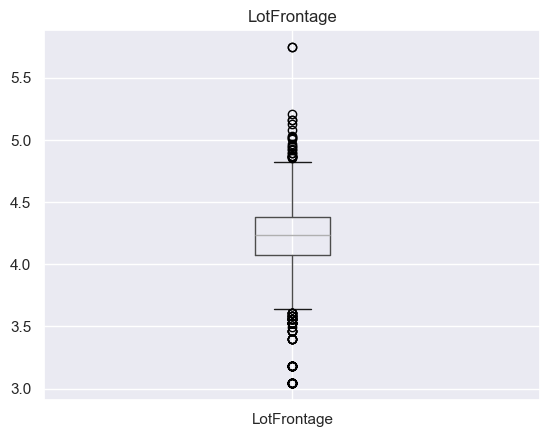

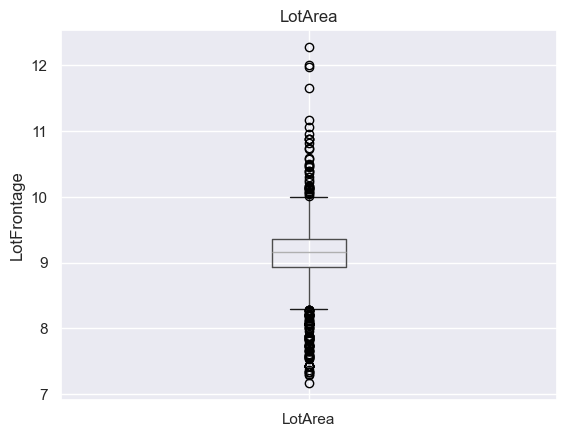

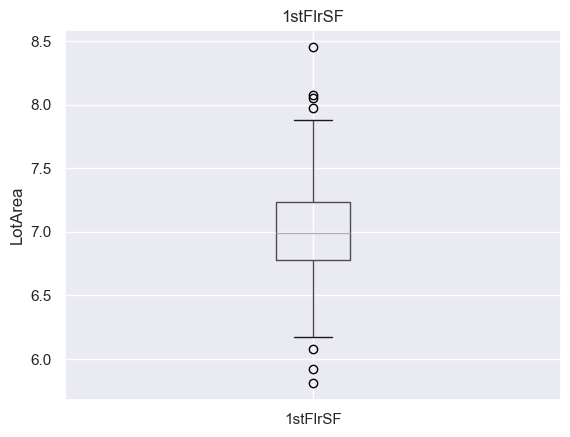

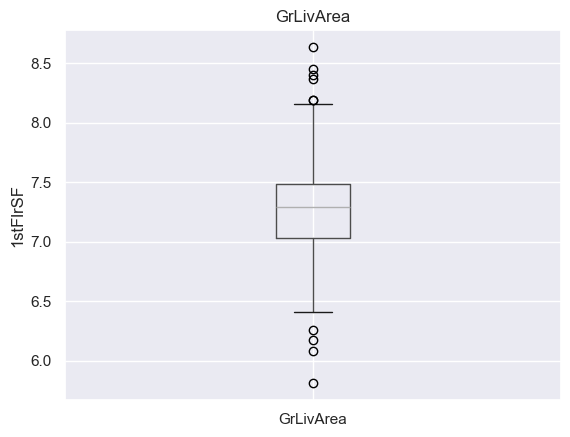

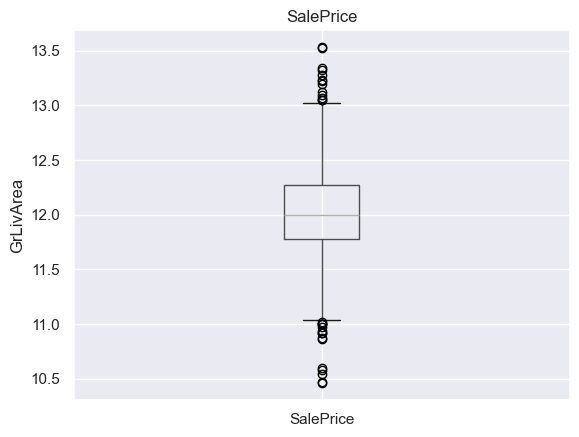

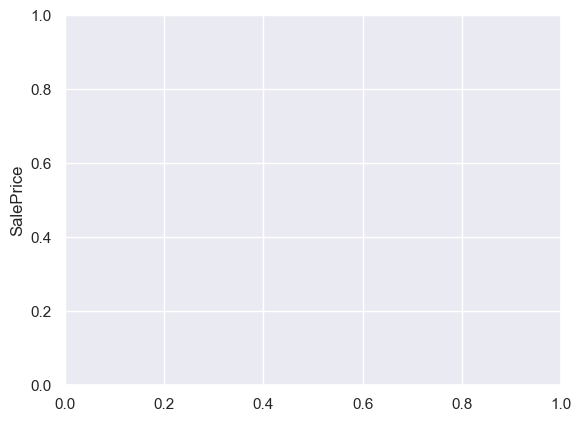

In [304]:
for values in continous_data:
    data = train.copy()
    if 0 in data[values].unique():
        pass

    else: 
        data[values] = np.log(data[values])
        data.boxplot(column=values)
        plt.title(values)
        plt.figure()
        plt.ylabel(values)
      


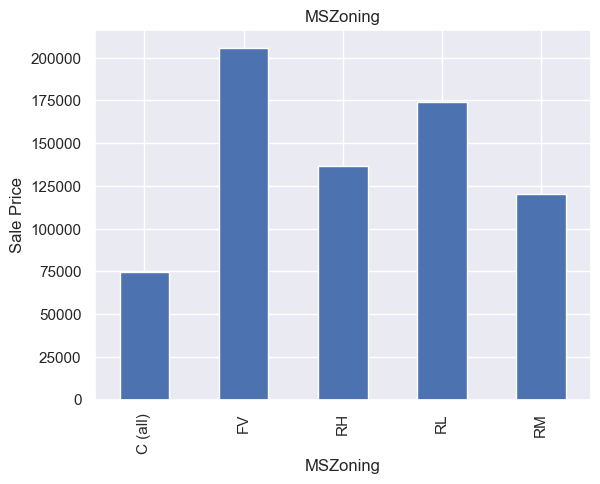

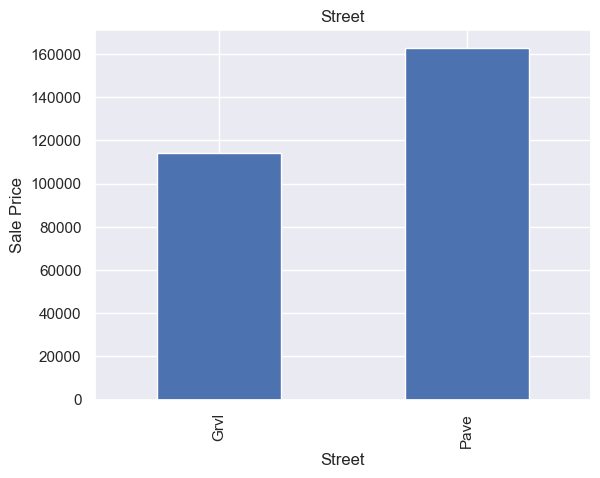

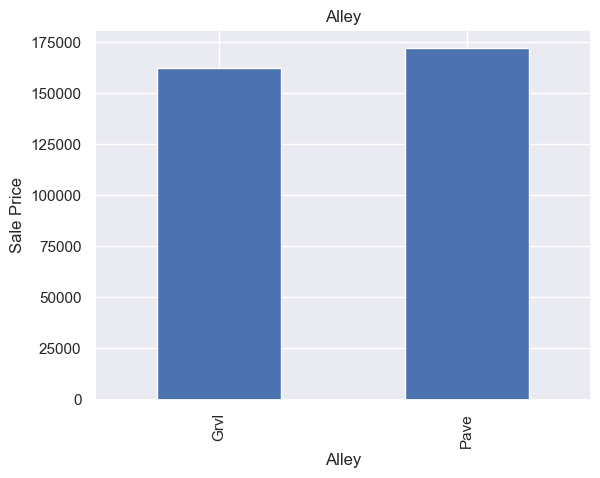

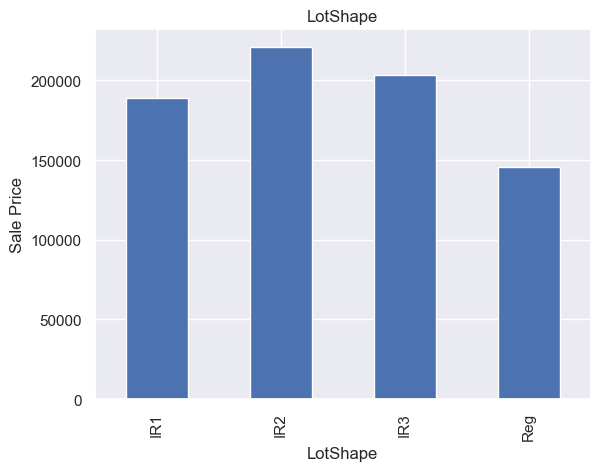

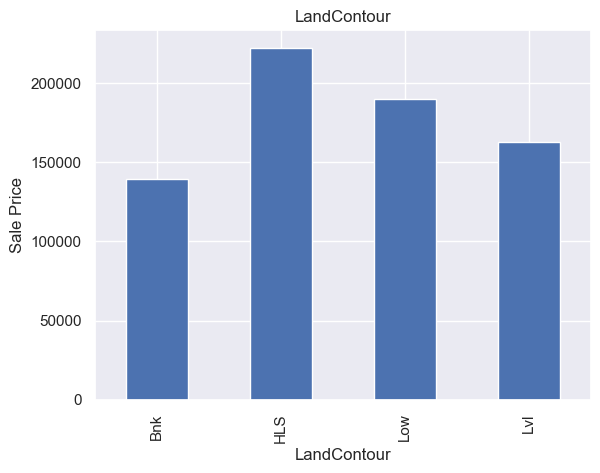

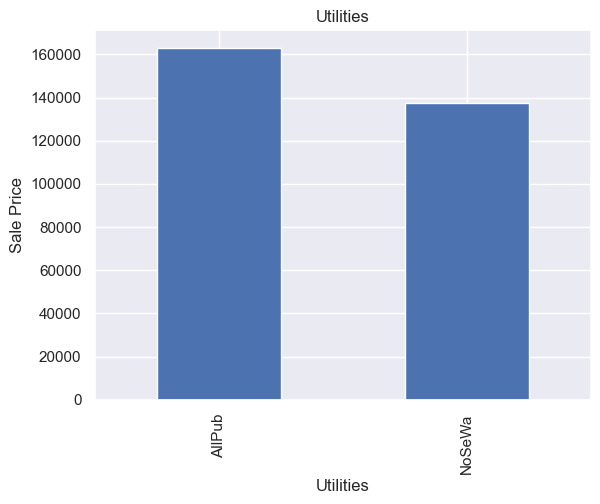

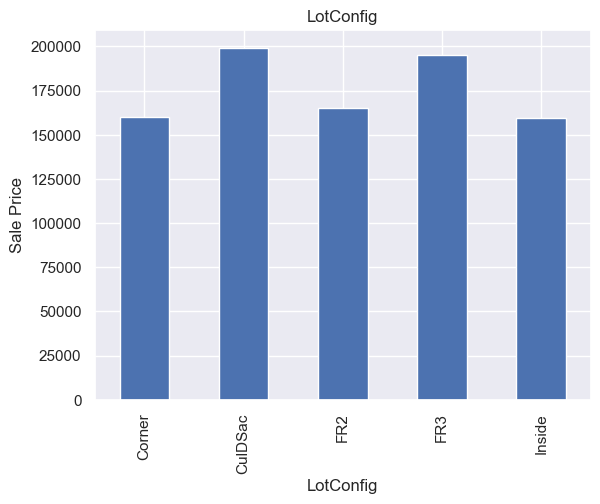

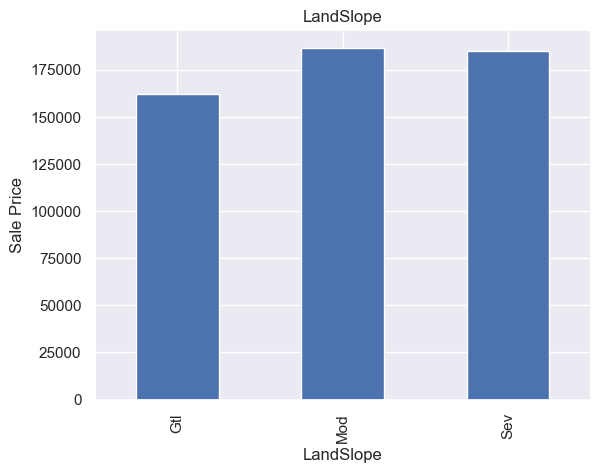

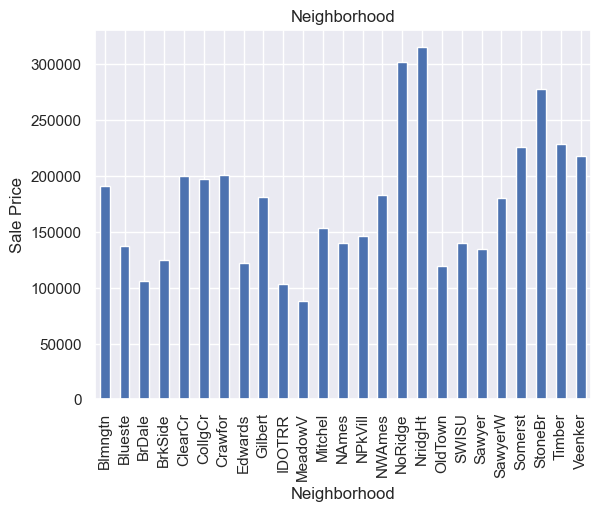

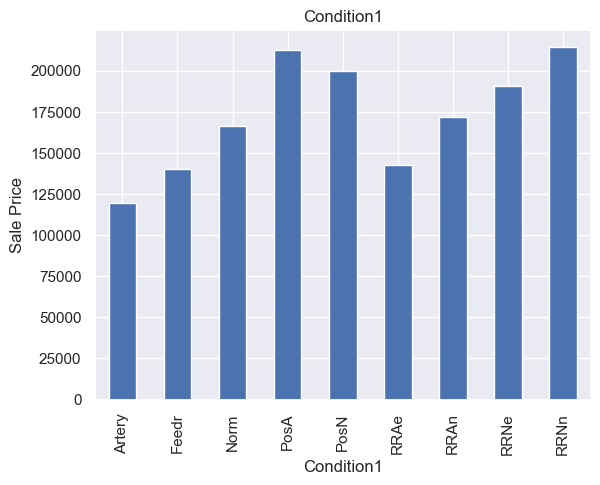

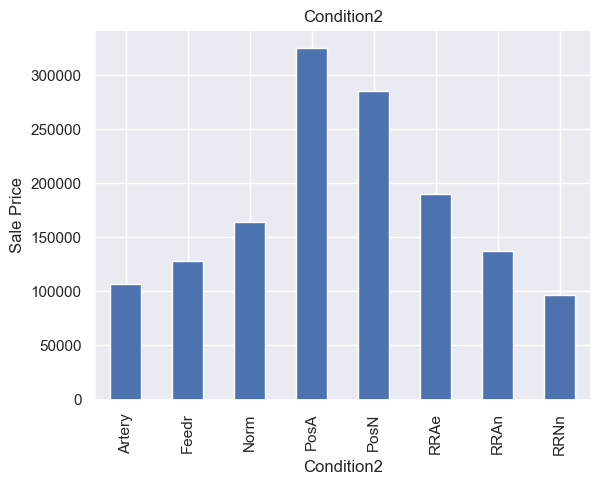

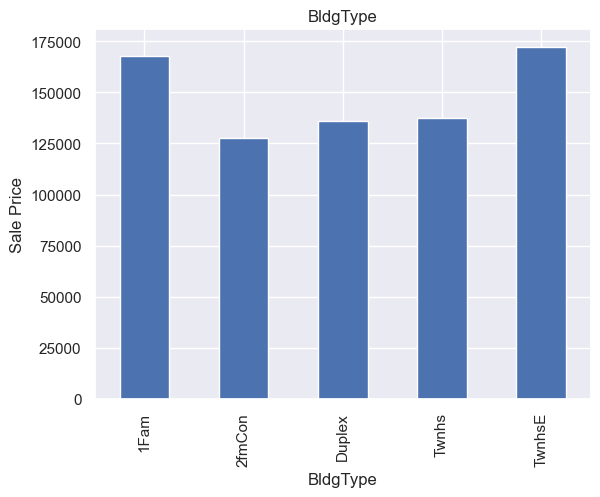

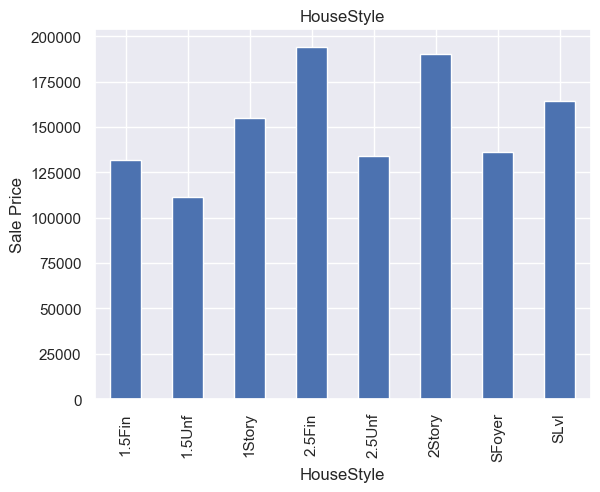

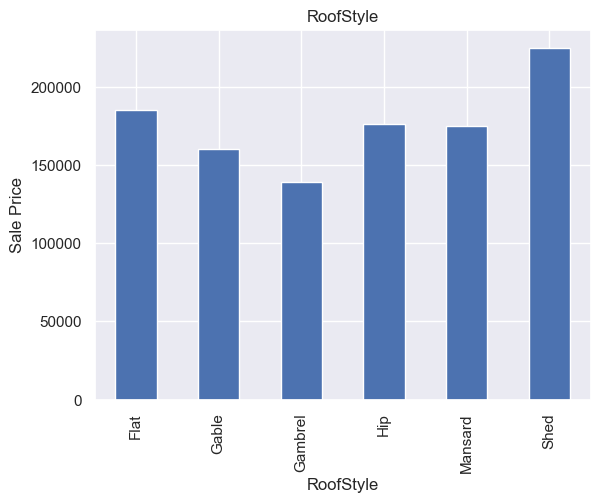

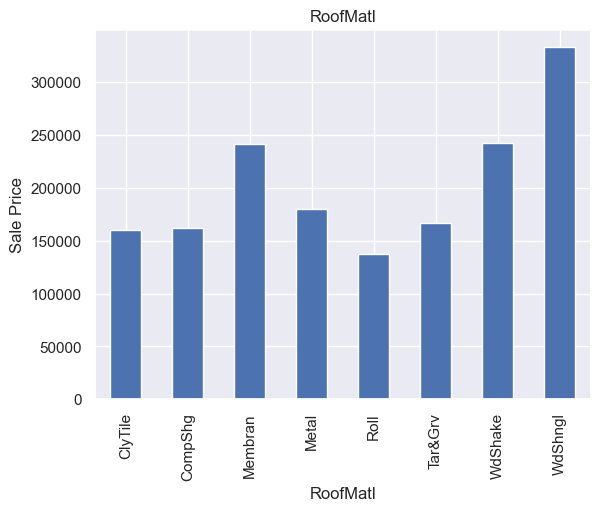

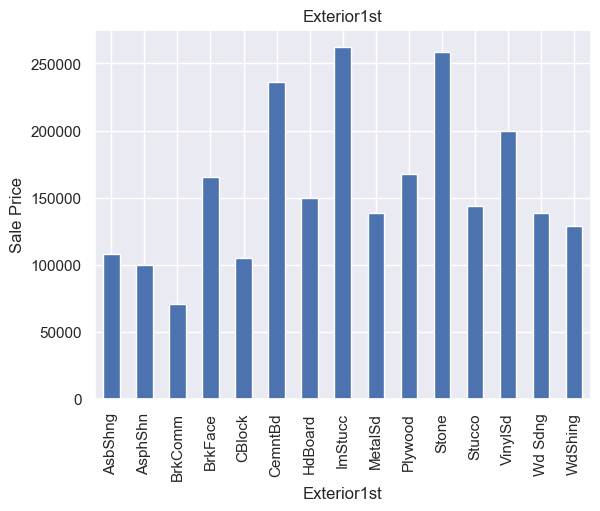

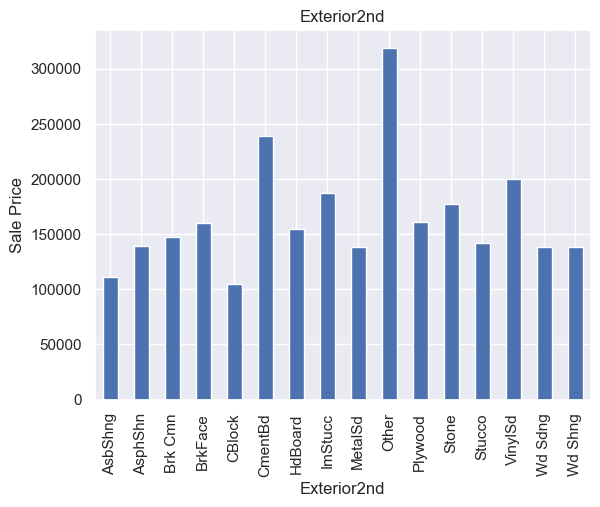

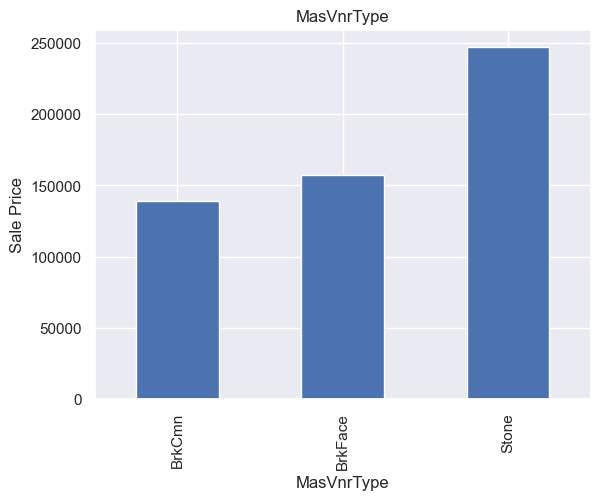

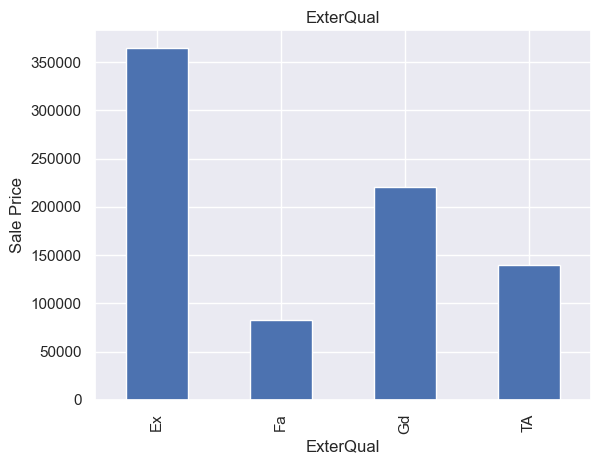

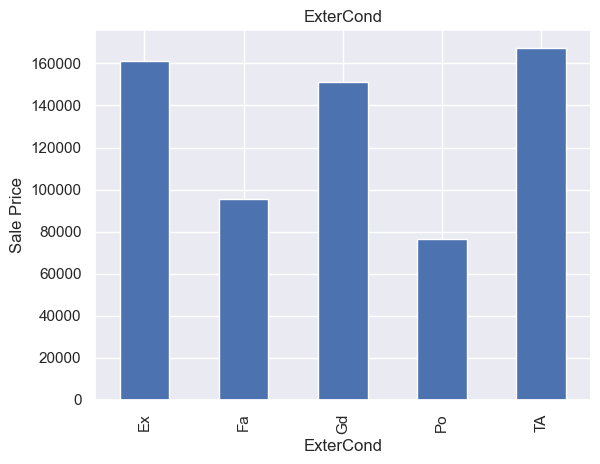

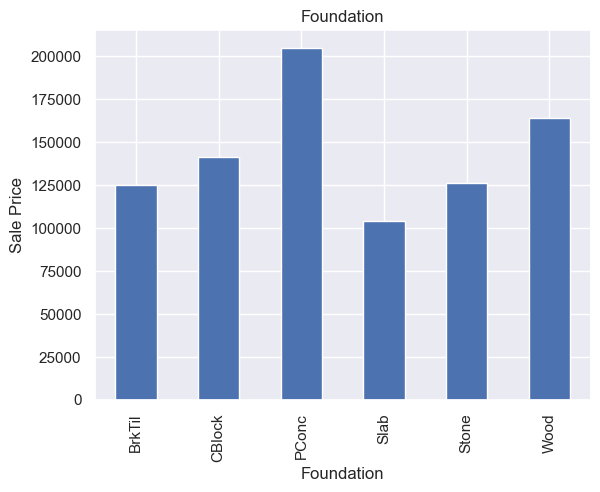

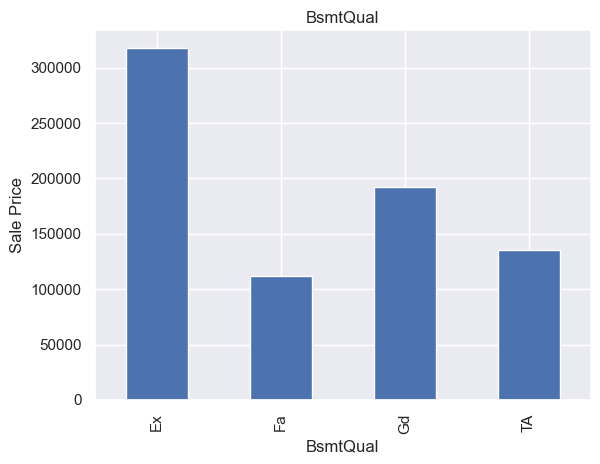

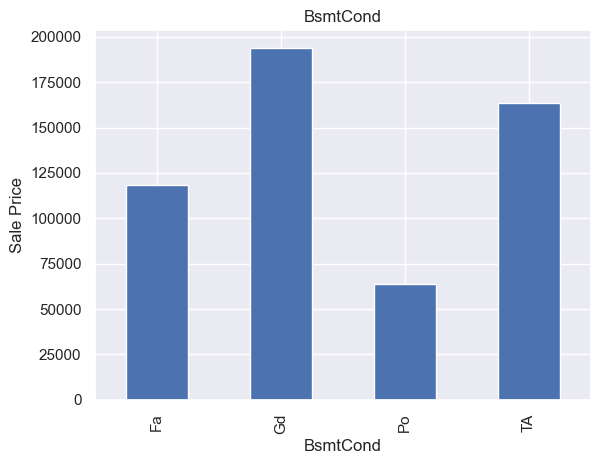

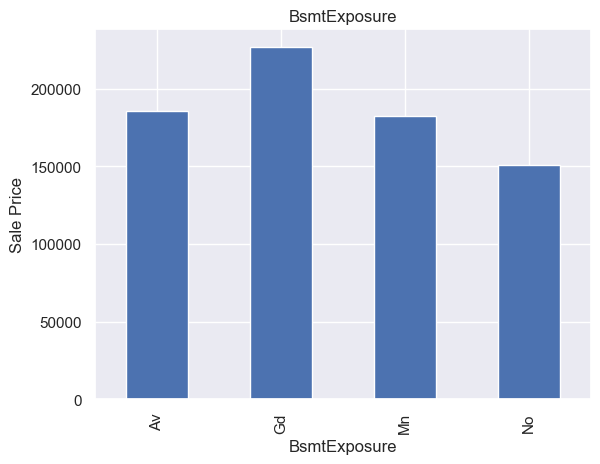

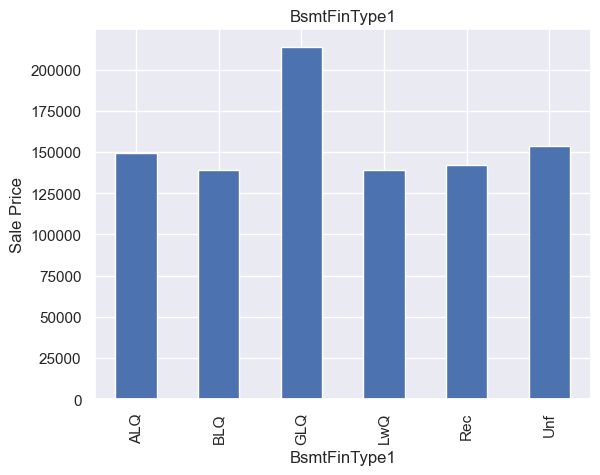

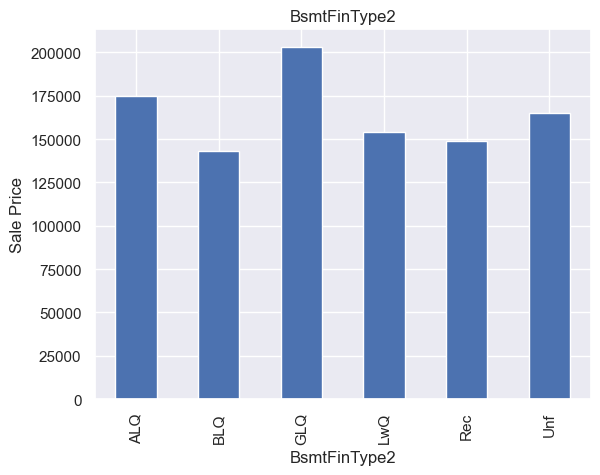

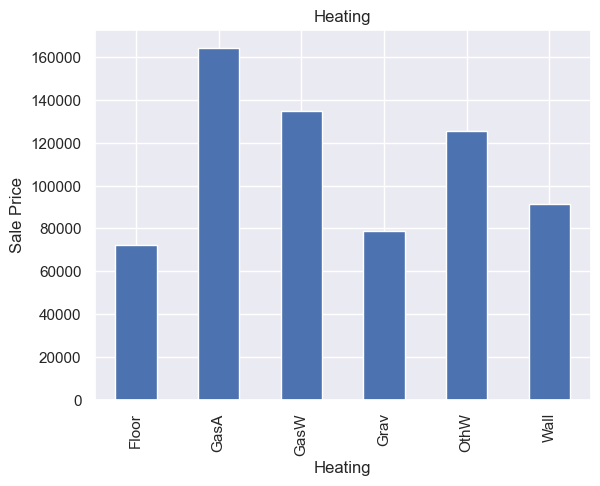

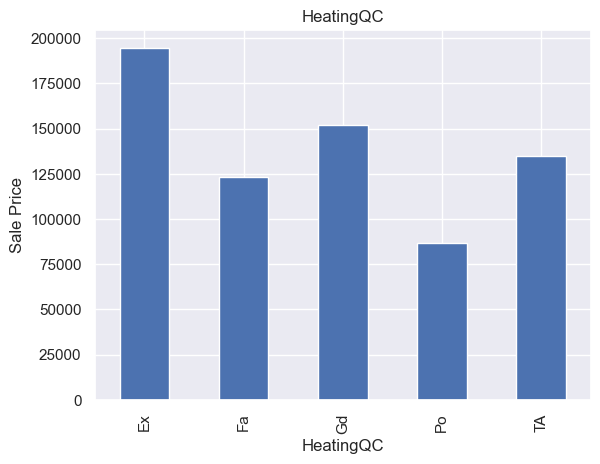

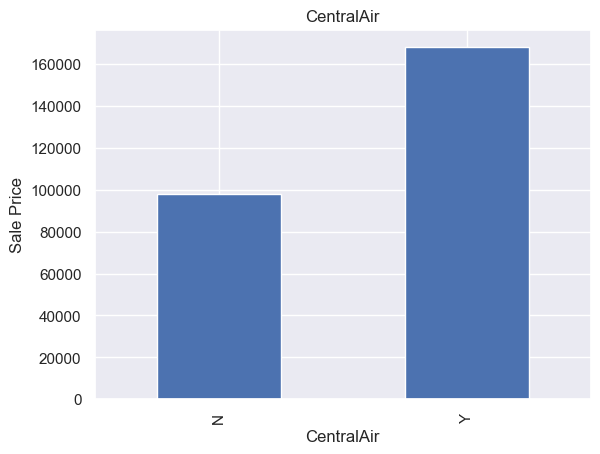

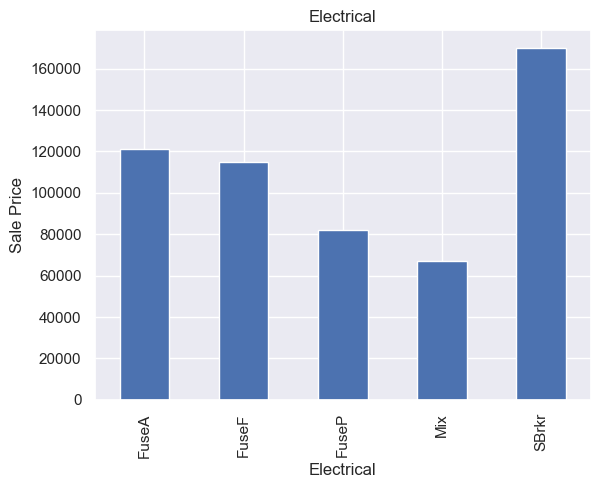

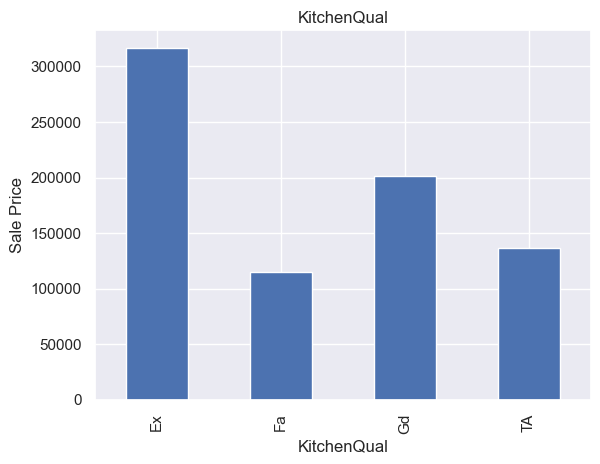

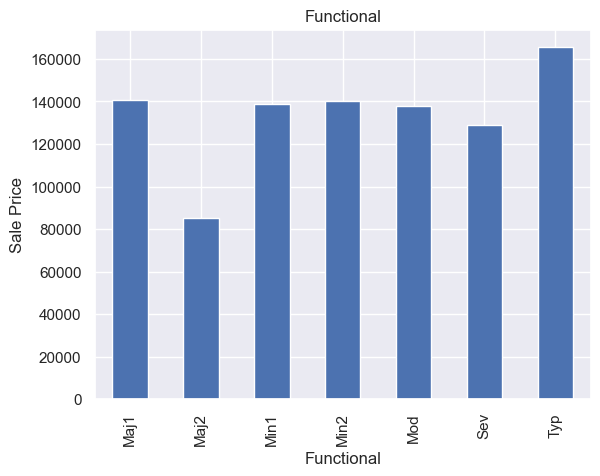

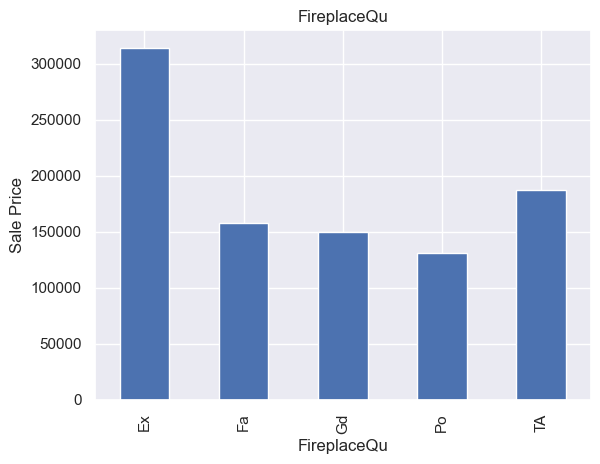

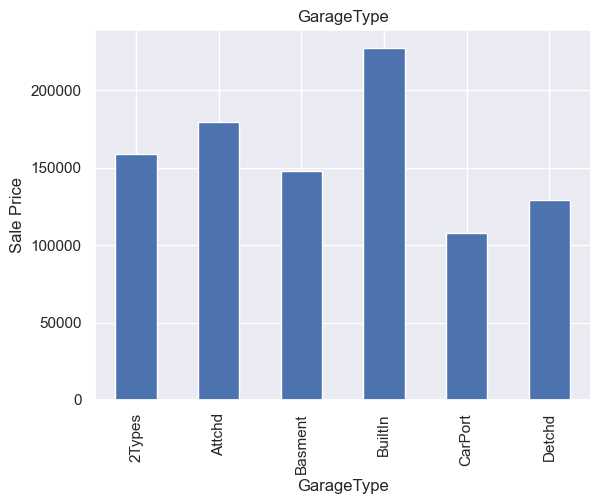

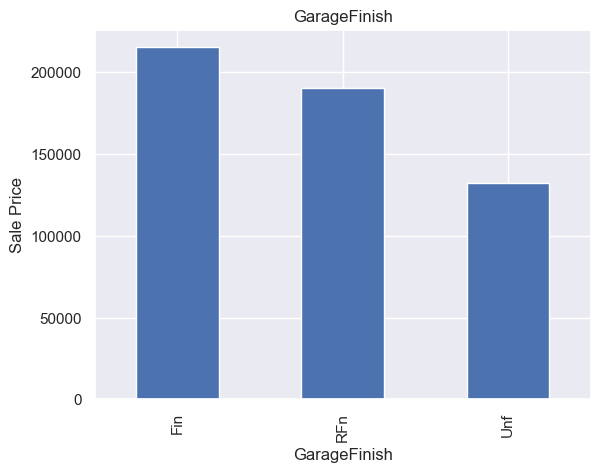

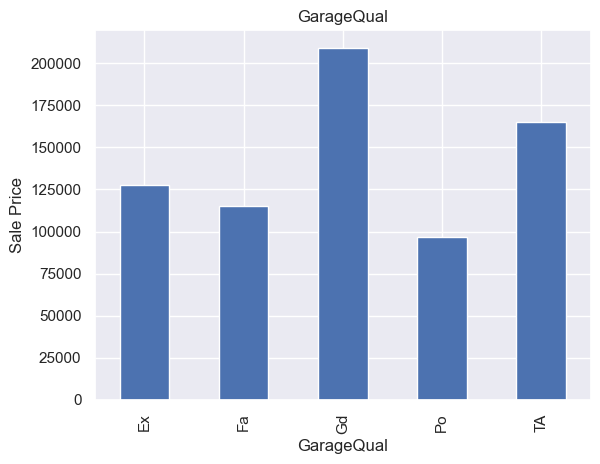

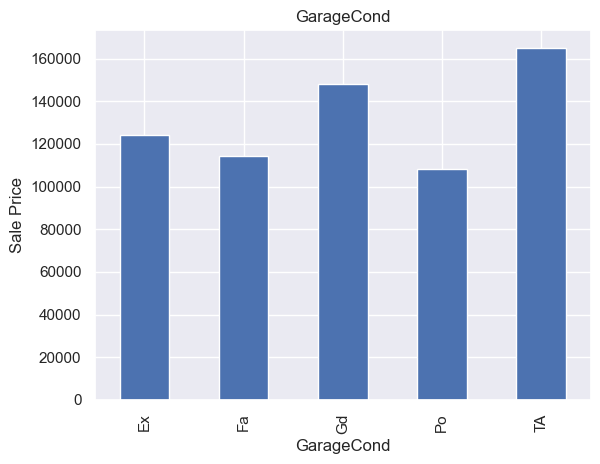

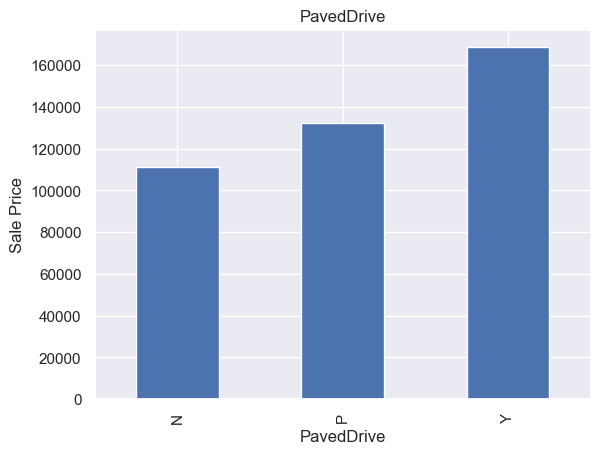

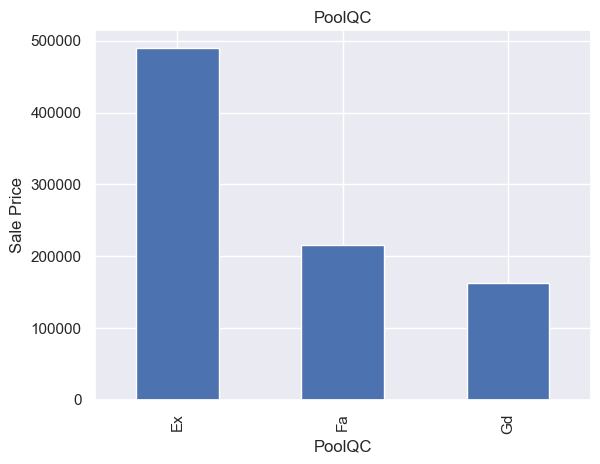

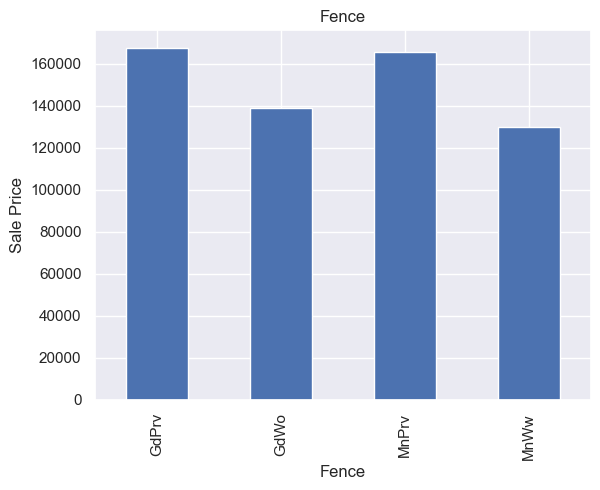

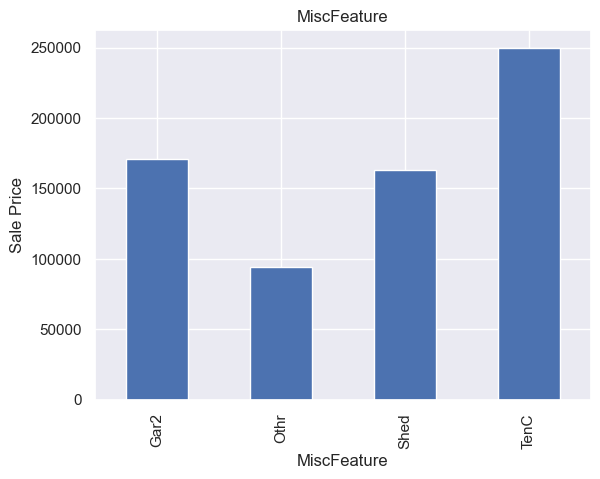

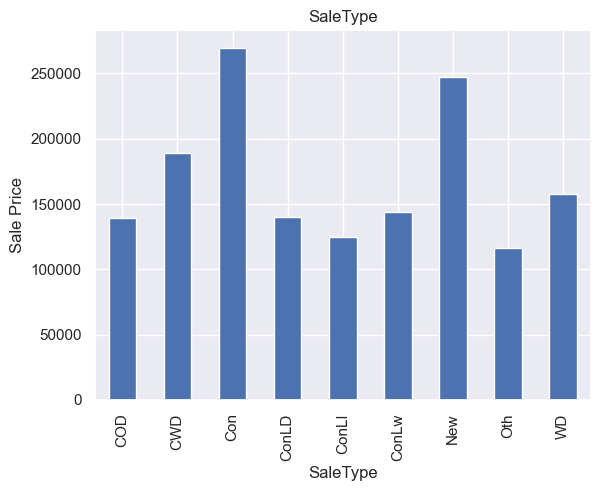

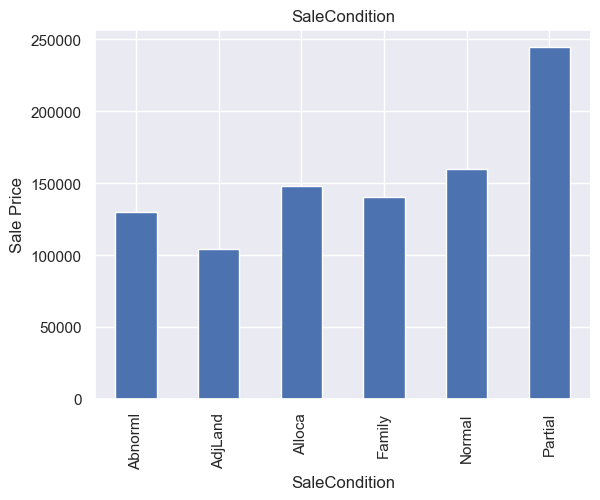

In [305]:
for feature in categorical_data:
    data = train.copy()
    data.groupby(feature)["SalePrice"].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Sale Price')
    plt.title(feature)
    plt.show()